Great source for time series:
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# IMPORT DATASETS AND LIBRARIES

In [1]:
#Instalations: #Instalations: 

# !pip install plotly
# !pip install chart_studio
# !pip3 install --user scipy==1.2.0
# !pip install statsmodels --upgrade
# !pip install optuna

#After the installation- need to restart the runtime


In [2]:
#restart the runtime so the installation we did above will be refreshed
import os
def restart_runtime():
  os.kill(os.getpid(), 9) 

In [3]:
# import libraries

#data explanatory and manipulating
import pandas as pd
from copy import copy
import numpy as np
# !pip install missingno
# import missingno as msno 
from datetime import date, timedelta,datetime
import itertools 


#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Preperation for model:
from pathlib import Path
from pylab import rcParams
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

#Statistical model
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

#DNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Bidirectional,Dropout

# Random forest:
from sklearn.ensemble import RandomForestRegressor

#Hyper parameter tuning:
import optuna
from optuna.trial import TrialState
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore") #, category=FutureWarning


# sns.set(style = 'whitegrid')
plt.style.use('seaborn-dark')
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '16'


c:\Users\user\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



<Figure size 1200x800 with 0 Axes>

In [4]:
# Read the file
temperature_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

'''
Features:
  - dt: Date on which records were observed
  - AverageTemperature : Mean temperature of the country 
  - AverageTemperatureUncertainity: Uncertainty associated with recorded temperature 
  - Country: Country name
'''
temperature_df





,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [5]:
# Add Dates Columns
#Century:
temperature_df['Century']=temperature_df['dt'].apply(lambda x: x.split('-')[0]).str[:2]
temperature_df['Century']=temperature_df['Century'].astype(int)
temperature_df['Century']=temperature_df['Century']+1

#year:
temperature_df['Year']=temperature_df['dt'].apply(lambda x: x.split('-')[0])
temperature_df['Year']=temperature_df['Year'].astype(int)


#month:
temperature_df['Month']=temperature_df['dt'].apply(lambda x: x.split('-')[1])
temperature_df['Month']=temperature_df['Month'].astype(int)


# EXPLORATORY DATA ANALYSIS

In [6]:
temperature_df.describe()

,AverageTemperature,AverageTemperatureUncertainty,Century,Year,Month
count,544811.000000,545550.000000,577462.000000,577462.000000,577462.000000
mean,17.193354,1.019057,19.571319,1908.819188,6.496098
std,10.953966,1.201930,0.722831,65.916942,3.450693
min,-37.658000,0.052000,18.000000,1743.000000,1.000000
25%,10.025000,0.323000,19.000000,1862.000000,3.000000
50%,20.901000,0.571000,20.000000,1914.000000,6.000000
75%,25.814000,1.206000,20.000000,1964.000000,9.000000
max,38.842000,15.003000,21.000000,2013.000000,12.000000


<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

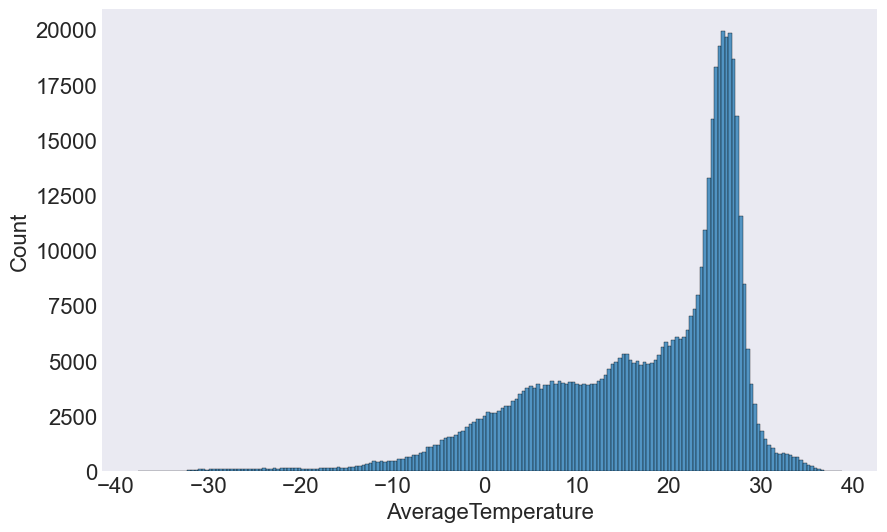

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(temperature_df['AverageTemperature'])

In [8]:
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
palette = {
    18: 'tab:blue',
    19: 'tab:purple',
    20: 'tab:orange',
    21: 'tab:red'
}

<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

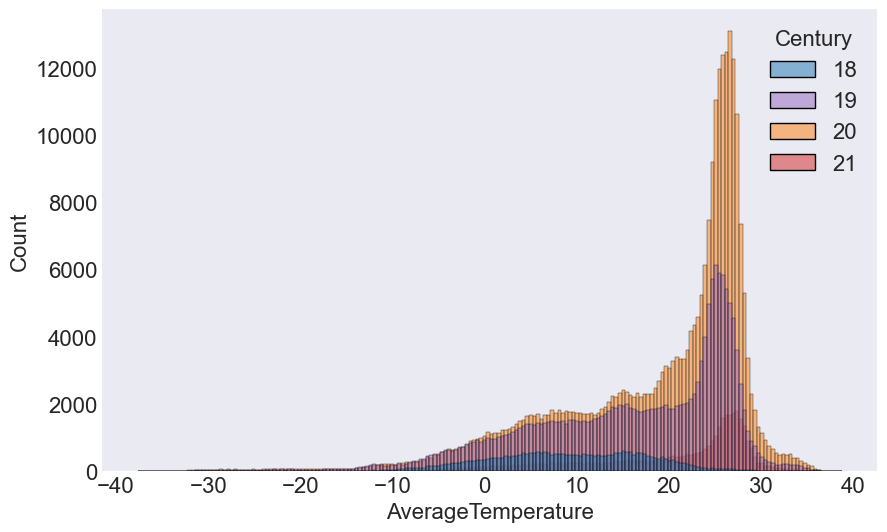

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=temperature_df, x='AverageTemperature', hue='Century',palette=palette)

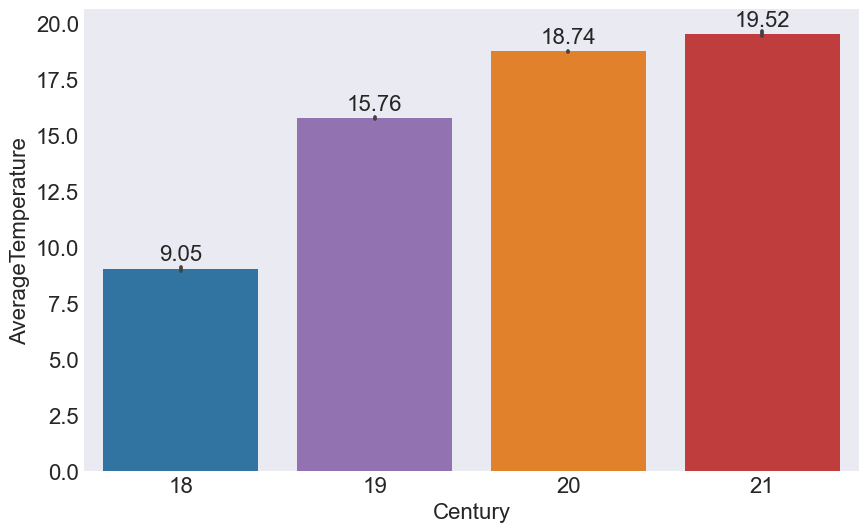

In [10]:
plt.figure(figsize=(10,6))
ax= sns.barplot(data=temperature_df,x='Century', y='AverageTemperature', palette=palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    

<AxesSubplot:xlabel='AverageTemperatureUncertainty', ylabel='Count'>

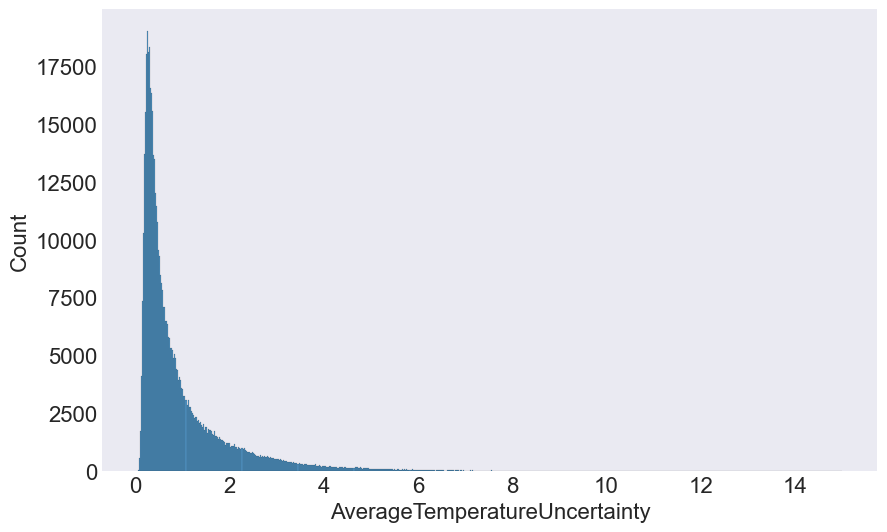

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(temperature_df['AverageTemperatureUncertainty'])

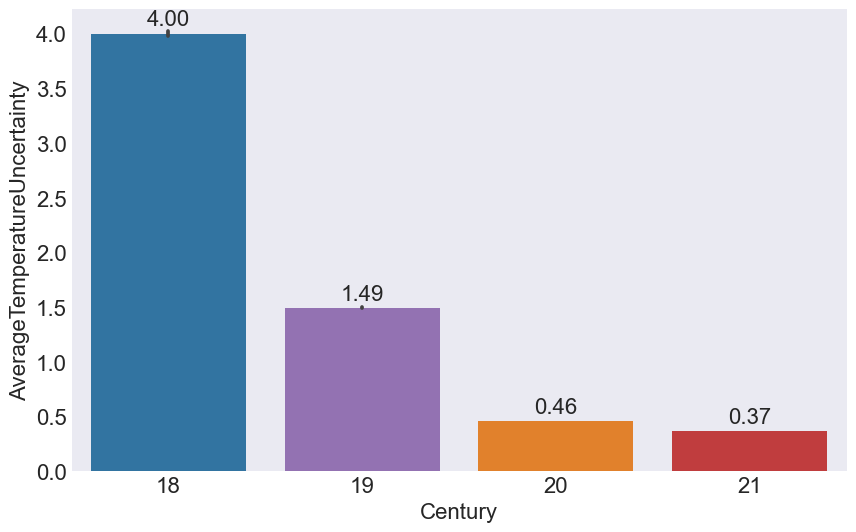

In [12]:
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '16'
ax=sns.barplot(data=temperature_df,x='Century', y='AverageTemperatureUncertainty', palette=palette)
# ax.set_xlabel('Century', fontsize=16)
# ax.set_ylabel('Average Temperature Uncertainty', fontsize=16)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [13]:
#WorldWide temperture per month, year, century
ww_temp_group_by = temperature_df.groupby(["Century","Year", "Month"]).mean('AverageTemperature')
ww_temp_group_by.reset_index(inplace=True)
ww_temp_group_by

,Century,Year,Month,AverageTemperature,AverageTemperatureUncertainty
0,18,1743,11,5.184140,2.183520
1,18,1743,12,NaN,NaN
2,18,1744,1,NaN,NaN
3,18,1744,2,NaN,NaN
4,18,1744,3,NaN,NaN
...,...,...,...,...,...
3234,21,2013,5,21.478050,0.479667
3235,21,2013,6,22.744508,0.520650
3236,21,2013,7,23.471711,0.533728
3237,21,2013,8,23.297855,0.591984


In [14]:
fig = px.line(ww_temp_group_by,x='Year', y='AverageTemperature', color='Month')
fig.update_layout(autosize=False,width=1000,height=500)
fig.show()

In [15]:
#Animation per month
fig = px.line(ww_temp_group_by,x='Year', y='AverageTemperature', color='Month',animation_frame='Month')
fig.show()

In [16]:
# To get the global average tempeature over years
df_global = temperature_df.groupby('Year').mean().reset_index()
df_global['Year'] = df_global['Year'].apply(lambda x: int(x))

# Uncertainity upper bound 
trace1 = go.Scatter(
    x = df_global['Year'], 
    y = np.array(df_global['AverageTemperature']) + np.array(df_global['AverageTemperatureUncertainty']), # Adding uncertinity
    name = 'Uncertainty top',
    line = dict(color = 'blue'))

# Uncertainity lower bound
trace2 = go.Scatter(
    x = df_global['Year'] , 
    y = np.array(df_global['AverageTemperature']) - np.array(df_global['AverageTemperatureUncertainty']), # Subtracting uncertinity
    fill = 'tonexty',
    name = 'Uncertainty bottom',
    line = dict(color = 'blue'))

# Recorded temperature
trace3 = go.Scatter(
    x = df_global['Year'] , 
    y = df_global['AverageTemperature'],
    name = 'Average Temperature',
    line = dict(color='purple'))
data = [trace1, trace2, trace3]

layout = go.Layout(
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'Average Temperature, °C'),
    title = 'Average Land Temperatures Globally',
    showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.update_layout(autosize=False,width=1000,height=500)
py.iplot(fig)


In [17]:
ww_temp_country_count = temperature_df.groupby("Year").count()
ww_temp_country_count.reset_index(inplace=True)

fig = px.bar(ww_temp_country_count,x='Year', y='Country')
fig.show()


##### conclusion
It appears that before 1857 data mostly represent countries with low average temperature and not represent well the global average temperature. To support the task of global temperature prediction I will remove records before 1857 and also 2013 (not fully observed)

In [18]:
temperature_df_manipulated =temperature_df.copy()

In [19]:
# Convert the year to int type and use the data above 1857 for visualization (Before this most of the countries do not have recorded reading)
temperature_df_manipulated = temperature_df_manipulated.loc[(temperature_df_manipulated['Year'] > 1857 )&(temperature_df_manipulated['Year'] <2013)]

temperature_df_manipulated.reset_index(inplace=True,drop=True)
temperature_df_manipulated

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Century,Year,Month
0,1858-01-01,-0.749,2.122,Åland,19,1858,1
1,1858-02-01,-3.366,0.814,Åland,19,1858,2
2,1858-03-01,-1.771,1.449,Åland,19,1858,3
3,1858-04-01,1.124,1.647,Åland,19,1858,4
4,1858-05-01,7.129,1.208,Åland,19,1858,5
...,...,...,...,...,...,...,...
443912,2012-08-01,18.946,1.127,Zimbabwe,21,2012,8
443913,2012-09-01,22.609,0.643,Zimbabwe,21,2012,9
443914,2012-10-01,23.482,0.574,Zimbabwe,21,2012,10
443915,2012-11-01,24.606,0.532,Zimbabwe,21,2012,11


Text(0, 0.5, 'Average Temperature Uncertainty')

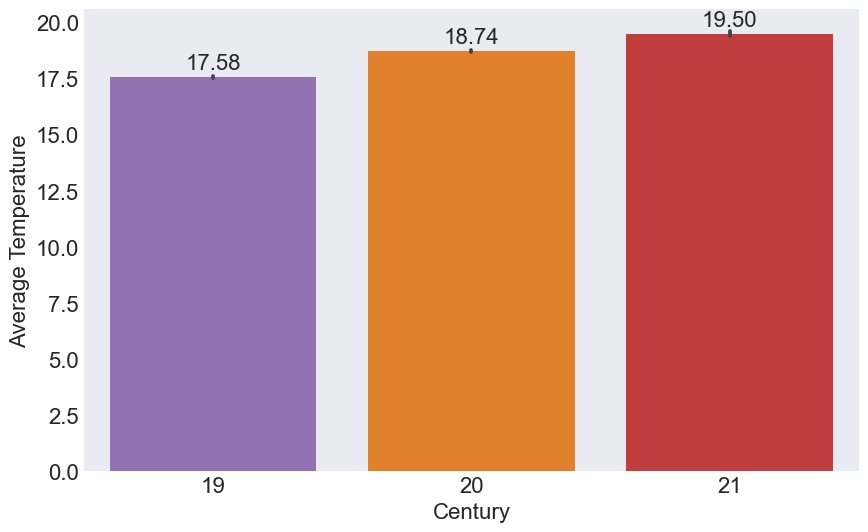

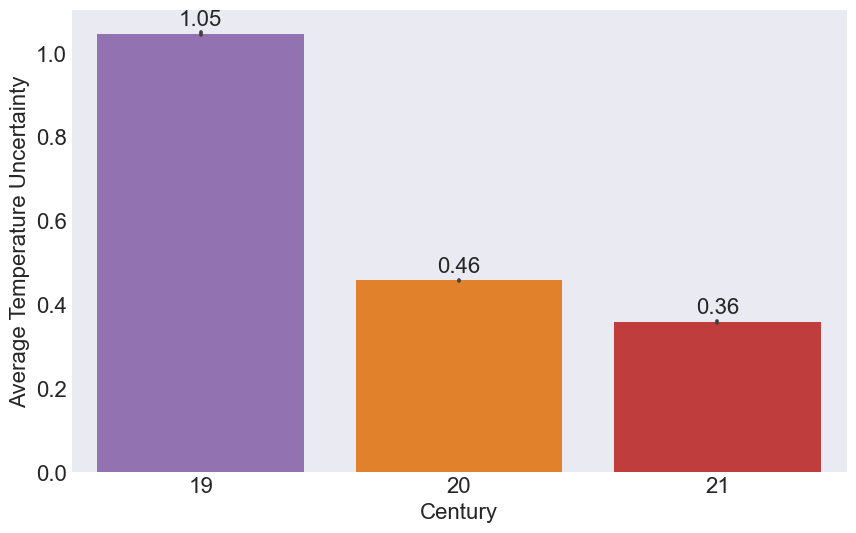

In [20]:
plt.figure(figsize=(10,6))
ax1= sns.barplot(data=temperature_df_manipulated,x='Century', y='AverageTemperature', palette=palette)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Century', fontsize=16)
plt.ylabel('Average Temperature', fontsize=16)
    
plt.figure(figsize=(10,6))
ax2=sns.barplot(data=temperature_df_manipulated,x='Century', y='AverageTemperatureUncertainty', palette=palette)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Century', fontsize=16)
plt.ylabel('Average Temperature Uncertainty', fontsize=16)

In [21]:
# To get the global average tempeature over years
df_global = temperature_df_manipulated.groupby('Year').mean().reset_index()
df_global['Year'] = df_global['Year'].apply(lambda x: int(x))

# Uncertainity upper bound 
trace1 = go.Scatter(
    x = df_global['Year'], 
    y = np.array(df_global['AverageTemperature']) + np.array(df_global['AverageTemperatureUncertainty']), # Adding uncertinity
    name = 'Uncertainty top',
    line = dict(color = 'blue'))

# Uncertainity lower bound
trace2 = go.Scatter(
    x = df_global['Year'] , 
    y = np.array(df_global['AverageTemperature']) - np.array(df_global['AverageTemperatureUncertainty']), # Subtracting uncertinity
    fill = 'tonexty',
    name = 'Uncertainty bottom',
    line = dict(color = 'blue'))

# Recorded temperature
trace3 = go.Scatter(
    x = df_global['Year'] , 
    y = df_global['AverageTemperature'],
    name = 'Average Temperature',
    line = dict(color='purple'))
data = [trace1, trace2, trace3]

layout = go.Layout(
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'Average Temperature, °C'),
    title = 'Average Land Temperatures Globally',
    showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)


# DATA MANIPULATION:


1.   Remove duplications in countries
2.   Remove countries with only few datapoints
3.   data imputation



## 1. Remove duplications in countries:

In [22]:
temperature_df_full=temperature_df_manipulated.copy()

In [23]:
temperature_df_full

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Century,Year,Month
0,1858-01-01,-0.749,2.122,Åland,19,1858,1
1,1858-02-01,-3.366,0.814,Åland,19,1858,2
2,1858-03-01,-1.771,1.449,Åland,19,1858,3
3,1858-04-01,1.124,1.647,Åland,19,1858,4
4,1858-05-01,7.129,1.208,Åland,19,1858,5
...,...,...,...,...,...,...,...
443912,2012-08-01,18.946,1.127,Zimbabwe,21,2012,8
443913,2012-09-01,22.609,0.643,Zimbabwe,21,2012,9
443914,2012-10-01,23.482,0.574,Zimbabwe,21,2012,10
443915,2012-11-01,24.606,0.532,Zimbabwe,21,2012,11


In [24]:
# Check the unique countries
temperature_df_manipulated['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [25]:
#Unify countries that has the same name, for example: 'United Kingdom (Europe)' & 'United Kingdom'
duplicates=temperature_df_manipulated[temperature_df_manipulated['Country'].str.contains('(',regex=False)]#regex=False because we are searching for '(' value. otherwise it will raise an error
duplicates=duplicates['Country'] #DataFrame
duplicates=duplicates.unique() #to get a list of the duplicates countries 


In [26]:
for i in duplicates:
  num=i.find(' (')
  print(i,num)
  temperature_df_manipulated.replace(i,i[0:num], inplace=True) 


Congo (Democratic Republic Of The) 5
Denmark (Europe) 7
Falkland Islands (Islas Malvinas) 16
France (Europe) 6
Netherlands (Europe) 11
United Kingdom (Europe) 14


In [27]:
#Check that there is no duplicated
duplicates=temperature_df_manipulated[temperature_df_manipulated['Country'].str.contains('(',regex=False)]#regex=False because we are searching for '(' value. otherwise it will raise an error
duplicates

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Century,Year,Month


In [28]:
# Do groupby country to see the count of values available for each country
country_group_df = temperature_df_manipulated.groupby(by = 'Country').count().reset_index('Country').rename(columns={'AverageTemperature':'AverageTemperatureCount','AverageTemperatureUncertainty' : 'AverageTemperatureUncertaintyCount'})
country_group_df=country_group_df.sort_values(by='AverageTemperatureCount')

In [29]:
fig = px.bar(country_group_df, x = 'Country', y = 'AverageTemperatureCount', title="number of records per country")
fig.show()

## 2. Remove countries with only few datapoints
 (less then 20% (6332*0.2= 1260))

In [30]:
# missing_records_threshold=1260

In [31]:
# countries_with_less_data=country_group_df[(country_group_df['AverageTemperatureCount'] < missing_records_threshold) | (country_group_df['AverageTemperatureUncertaintyCount'] < missing_records_threshold)]
# countries_with_less_data=countries_with_less_data.Country.tolist()

# countries_with_less_data

countries_with_less_data = country_group_df[(country_group_df['AverageTemperatureCount'] < 1300) | (country_group_df['AverageTemperatureUncertaintyCount'] < 1300)]
countries_with_less_data=countries_with_less_data['Country'].to_list()

In [32]:
countries_with_less_data

['Antarctica',
 'French Southern And Antarctic Lands',
 'Heard Island And Mcdonald Islands']

In [33]:
# Remove the countries with less data points
temperature_df_manipulated = temperature_df_manipulated[~temperature_df_manipulated['Country'].isin(countries_with_less_data)]
# Reset the index
temperature_df_manipulated.reset_index(inplace = True, drop = True)
temperature_df_manipulated

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Century,Year,Month
0,1858-01-01,-0.749,2.122,Åland,19,1858,1
1,1858-02-01,-3.366,0.814,Åland,19,1858,2
2,1858-03-01,-1.771,1.449,Åland,19,1858,3
3,1858-04-01,1.124,1.647,Åland,19,1858,4
4,1858-05-01,7.129,1.208,Åland,19,1858,5
...,...,...,...,...,...,...,...
441599,2012-08-01,18.946,1.127,Zimbabwe,21,2012,8
441600,2012-09-01,22.609,0.643,Zimbabwe,21,2012,9
441601,2012-10-01,23.482,0.574,Zimbabwe,21,2012,10
441602,2012-11-01,24.606,0.532,Zimbabwe,21,2012,11


## 3. Data Imputation:

Fill the missing values by doing rolling average per country and monthin the past 20 years


In [34]:
# Check for missing values
temperature_df_manipulated.isnull().sum()

dt                                  0
AverageTemperature               9475
AverageTemperatureUncertainty    9475
Country                             0
Century                             0
Year                                0
Month                               0
dtype: int64

In [35]:
#Option #1:Fill the missing values by doing rolling average per country and month in past 20 years (240 months)
temperature_df_manipulated['MA'] = temperature_df_manipulated.groupby(['Country','Month']).AverageTemperature.transform(lambda x: x.rolling(20,min_periods=1).mean())
temperature_df_manipulated['MA2'] = temperature_df_manipulated.groupby(['Country','Month']).AverageTemperatureUncertainty.transform(lambda x: x.rolling(20,min_periods=1).mean())

temperature_df_manipulated.AverageTemperature.fillna(temperature_df_manipulated.MA, inplace=True)
temperature_df_manipulated.AverageTemperatureUncertainty.fillna(temperature_df_manipulated.MA2, inplace=True)

del temperature_df_manipulated['MA']
del temperature_df_manipulated['MA2']

# temperature_df_manipulated

#Option #2: Fill the missing values WORLDWIDE by doing rolling average on past 20 years (240 months)
# temperature_df_manipulated['AverageTemperature'] = temperature_df_manipulated['AverageTemperature'].fillna(temperature_df_manipulated['AverageTemperature'].rolling(240, min_periods = 1).mean())
# temperature_df_manipulated['AverageTemperatureUncertainty']= temperature_df_manipulated['AverageTemperatureUncertainty'].fillna(temperature_df_manipulated['AverageTemperatureUncertainty'].rolling(240, min_periods=1).mean())

In [36]:
temperature_df_manipulated.isna().sum()

dt                                  0
AverageTemperature               1274
AverageTemperatureUncertainty    1274
Country                             0
Century                             0
Year                                0
Month                               0
dtype: int64

In [37]:
temperature_df_manipulated[temperature_df_manipulated['AverageTemperature'].isnull()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Century,Year,Month
12917,1858-06-01,NaN,NaN,Angola,19,1858,6
12919,1858-08-01,NaN,NaN,Angola,19,1858,8
12922,1858-11-01,NaN,NaN,Angola,19,1858,11
12923,1858-12-01,NaN,NaN,Angola,19,1858,12
35237,1858-06-01,NaN,NaN,Baker Island,19,1858,6
...,...,...,...,...,...,...,...
437949,1863-06-01,NaN,NaN,Zambia,19,1863,6
439749,1858-06-01,NaN,NaN,Zimbabwe,19,1858,6
439751,1858-08-01,NaN,NaN,Zimbabwe,19,1858,8
439754,1858-11-01,NaN,NaN,Zimbabwe,19,1858,11


In [38]:
# Drop null records after imputation (first years- cannon perform imputation)
temperature_df_manipulated=temperature_df_manipulated[~temperature_df_manipulated['AverageTemperature'].isnull()]

In [39]:
temperature_df_manipulated

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Century,Year,Month
0,1858-01-01,-0.749,2.122,Åland,19,1858,1
1,1858-02-01,-3.366,0.814,Åland,19,1858,2
2,1858-03-01,-1.771,1.449,Åland,19,1858,3
3,1858-04-01,1.124,1.647,Åland,19,1858,4
4,1858-05-01,7.129,1.208,Åland,19,1858,5
...,...,...,...,...,...,...,...
441599,2012-08-01,18.946,1.127,Zimbabwe,21,2012,8
441600,2012-09-01,22.609,0.643,Zimbabwe,21,2012,9
441601,2012-10-01,23.482,0.574,Zimbabwe,21,2012,10
441602,2012-11-01,24.606,0.532,Zimbabwe,21,2012,11


# DATA VISUALIZATION

In [40]:
countries = temperature_df_manipulated['Country'].unique().tolist()

In [41]:
# Get the mean temperature for each country
mean_temperature = []
for i in countries:
    mean_temperature.append(temperature_df_manipulated[temperature_df_manipulated['Country'] == i]['AverageTemperature'].mean())

In [42]:
# Plot the mean teamperature of countries
data = [ dict(type = 'choropleth', # type of map
              locations = countries, # location names
              z = mean_temperature, # temperature of countries
              locationmode = 'country names')
       ]

layout = dict(title = 'Average Global Land Temperatures',
              geo = dict(showframe = False,
                         showocean = True, # to show the ocean
                         oceancolor = '#3399FF',
                         projection = dict(type = 'orthographic'))) # to get the globe view),


fig = dict(data = data, layout = layout)
py.iplot(fig, validate = False, filename = 'worldmap')

Indexing

In [52]:
# To get the global average tempeature over years
df_global_monthly = temperature_df_manipulated.groupby(['dt']).mean().reset_index()
df_global_monthly=df_global_monthly.drop(['Century','Year'],axis=1).set_index('dt')
df_global_monthly.index = pd.to_datetime(df_global_monthly.index)

In [53]:
infered_freq=df_global_monthly.index.inferred_freq
print("freq:",df_global_monthly.index.freq)
print("infered freq:",df_global_monthly.index.inferred_freq)
print(df_global_monthly.index)
infered_freq

freq: None
infered freq: MS
DatetimeIndex(['1858-01-01', '1858-02-01', '1858-03-01', '1858-04-01',
               '1858-05-01', '1858-06-01', '1858-07-01', '1858-08-01',
               '1858-09-01', '1858-10-01',
               ...
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01'],
              dtype='datetime64[ns]', name='dt', length=1860, freq=None)


'MS'

In [54]:
df_for_arima=df_global_monthly.copy()
df_for_arima=df_for_arima.drop(['AverageTemperatureUncertainty','Month'],axis=1)
df_for_arima.asfreq(infered_freq)

,AverageTemperature
dt,
1858-01-01,11.777279
1858-02-01,12.040711
1858-03-01,14.557608
1858-04-01,17.458020
1858-05-01,19.502029
...,...
2012-08-01,23.812617
2012-09-01,22.374492
2012-10-01,20.281838


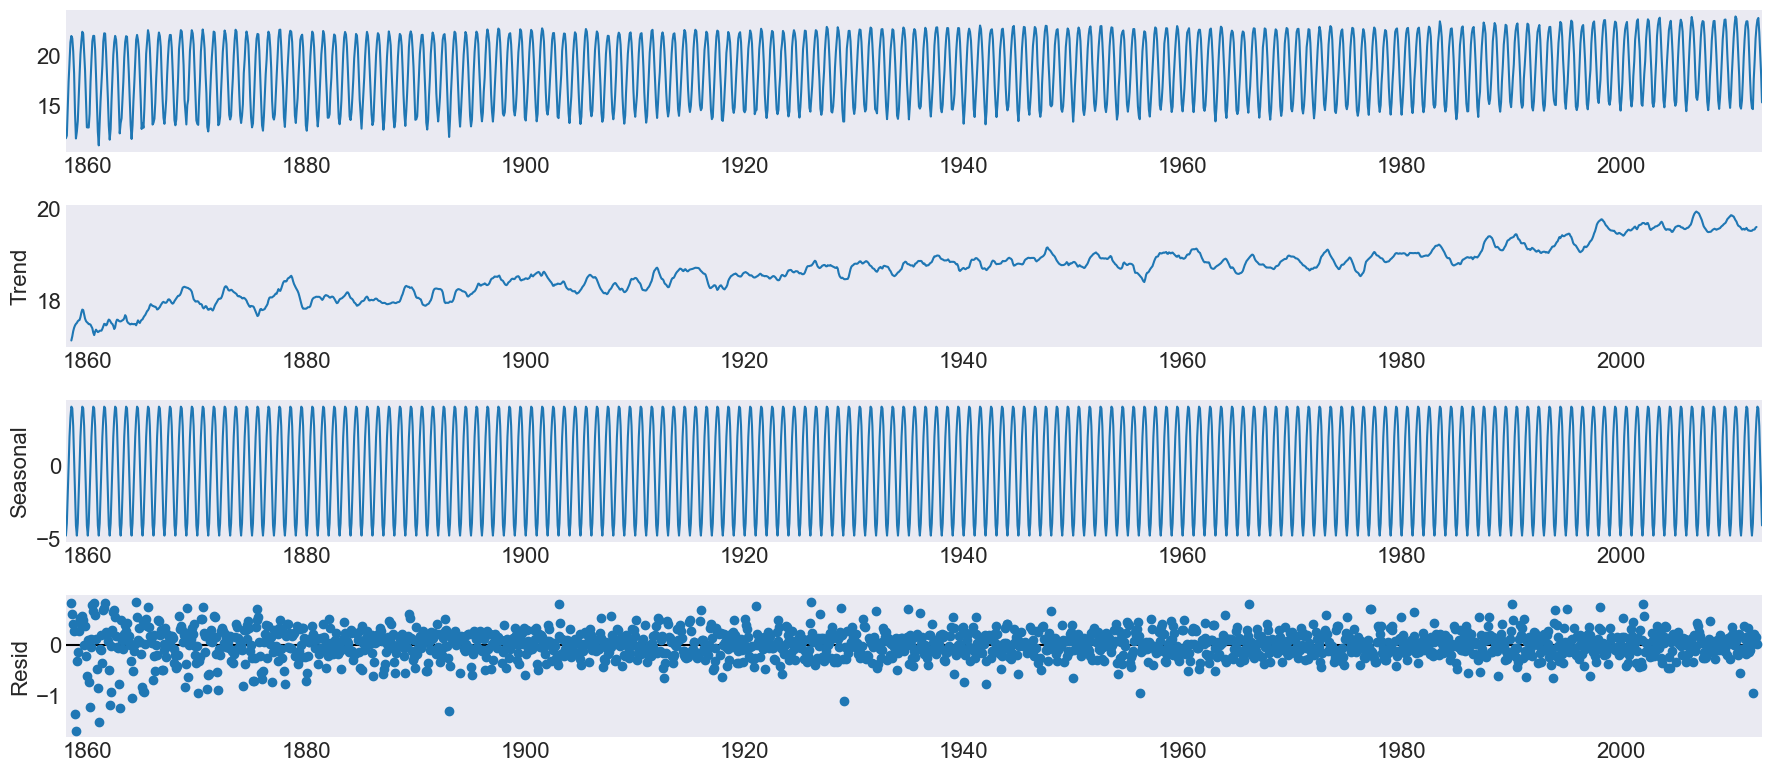

In [55]:
rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(df_for_arima.asfreq(infered_freq) ,model='additive') #infered_freq in this case- 'MS' (Month start).
decomposition = sm.tsa.seasonal_decompose(df_for_arima ,model='additive') #infered_freq in this case- 'MS' (Month start)

fig = decomposition.plot()
plt.show()


In [56]:
print(decomposition.seasonal)

dt
1858-01-01   -4.750736
1858-02-01   -3.912750
1858-03-01   -2.057870
1858-04-01   -0.050101
1858-05-01    2.004290
                ...   
2012-08-01    3.946277
2012-09-01    2.733823
2012-10-01    0.587419
2012-11-01   -1.826087
2012-12-01   -4.053208
Name: seasonal, Length: 1860, dtype: float64


#Define the DataSet

In [57]:
df_global_monthly

,AverageTemperature,AverageTemperatureUncertainty,Month
dt,,,
1858-01-01,11.777279,2.207858,1.0
1858-02-01,12.040711,1.221225,2.0
1858-03-01,14.557608,1.372618,3.0
1858-04-01,17.458020,1.496838,4.0
1858-05-01,19.502029,1.407078,5.0
...,...,...,...
2012-08-01,23.812617,0.553625,8.0
2012-09-01,22.374492,0.485321,9.0
2012-10-01,20.281838,0.527038,10.0


# Stationary check- pre preperations before time-series models:
Will be checked according to ADF test.

In [58]:
# statistic test (ADF) to check to stationary hypothesis
'''
if The p-value is greater than significance level of 0.05 or 0.01 (what we choose) 
and the ADF statistic is higher than any of the critical values, WE ARE NOT rejecting
the null hypothesis (HO) which means, the time series is in fact non-stationary.

to summarize: 
if ADF statistic > critical value --> we DO NOT reject HO -->The data is not stationary
if ADF statistic < critical value --> we DO reject HO --> The data is stationary

If reject HO=False- The data is not stationary
If reject HO=True- The data is stationary
'''

from statsmodels.tsa.stattools import adfuller
import math

def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    print("adf",ADF_stat )
    p = result[1]
    if math.isnan(p):
      ADF_stat=0
      p=0
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print("{}% certain this is staionary".format(cert))
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))
    return hyp

In [59]:
#Need to check only one numerical column
#AverageTemperature column
to_check1=df_global_monthly['AverageTemperature']
#AverageTemperatureUncertainty column
# to_check2=df_global_monthly['AverageTemperatureUncertainty']

print('ADF test for AverageTemperature column: ')
hyp=ADF_Cal(to_check1)
# print('\n\nADF test for AverageTemperatureUncertainty column: ')
# hyp=ADF_Cal(to_check2)

ADF test for AverageTemperature column: 
adf -1.6388995338402845
ADF Statistic: -1.638900
p-value: 0.462836
Critical Values
	1%: -3.434
	5%: -2.863
	10%: -2.568
Less than 90% certain that data is stationary
Reject H0: False


Conclusion- data is not stationary.
need to transform the data (can be done by Difference Transform)

In [61]:
year_df=df_global_monthly.copy()
year_df['dt']=year_df.index
year_df['Year']=year_df.index.year

# year_df['Year']=year_df['dt'].apply(lambda x: x.split('-')[0])
year_df_grouped=year_df.groupby('Year').mean()
year_df_grouped=year_df_grouped['AverageTemperature']
year_df_grouped


Year
1858    17.106394
1859    17.789769
1860    17.379582
1861    17.472451
1862    17.351997
          ...    
2008    19.550297
2009    19.676870
2010    19.756934
2011    19.584516
2012    19.595198
Name: AverageTemperature, Length: 155, dtype: float64

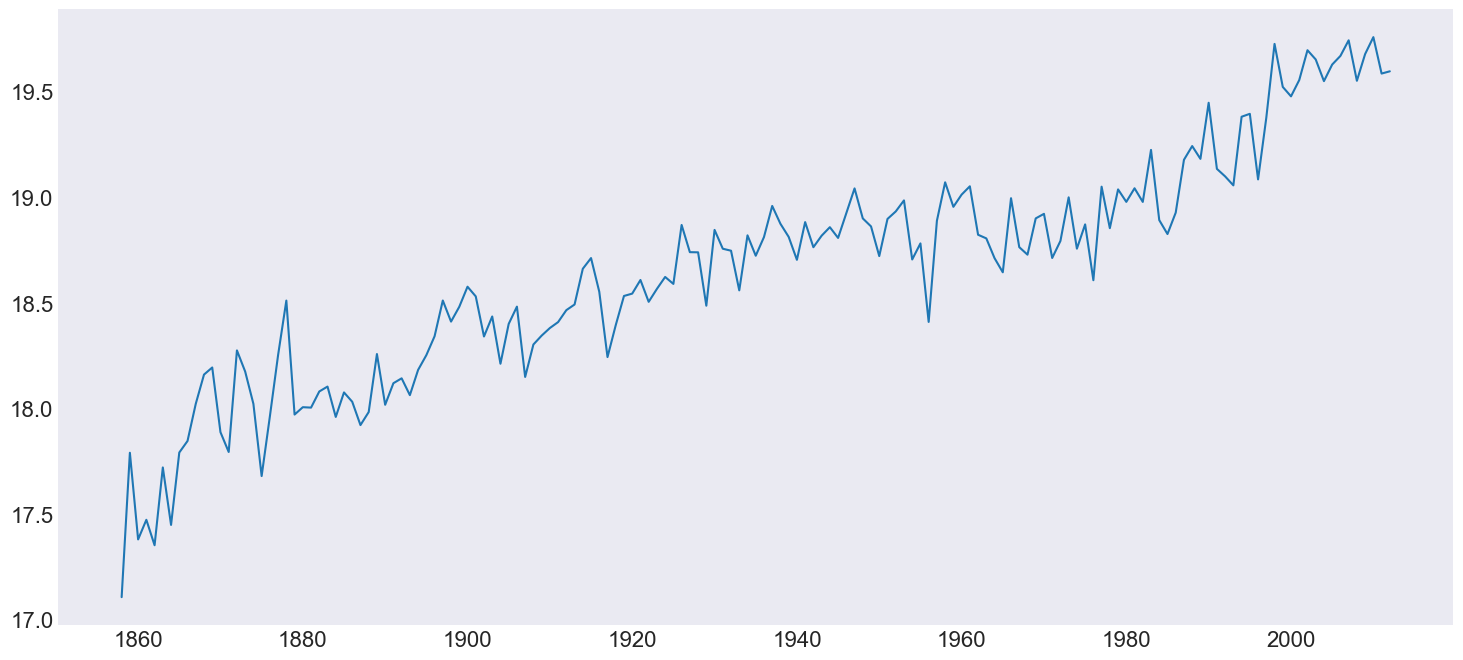

In [62]:
plt.plot(year_df_grouped)


# PERPARE THE DATA TO TRAIN THE MODEL




#Train- Test split

In [63]:
train_split=0.9
val_size=0.2

# # Split the data
# train = df_global_monthly[:int(0.9 * len(df_global_monthly))].drop(columns = 'dt').values
# test = df_global_monthly[int(0.9 * len(df_global_monthly)):].drop(columns = 'dt').values
# train,val=train_test_split(train,test_size=0.2,shuffle=False)
train = df_global_monthly[:int(train_split * len(df_global_monthly))]
test = df_global_monthly[int(train_split * len(df_global_monthly)):]

#for Arima model:
train_arima = df_for_arima[:int(train_split * len(df_for_arima))]
test_arima = df_for_arima[int(train_split * len(df_for_arima)):]


In [64]:
last_train_value=train.iloc[-1,0]
last_train_value

22.6727125

In [65]:
train

,AverageTemperature,AverageTemperatureUncertainty,Month
dt,,,
1858-01-01,11.777279,2.207858,1.0
1858-02-01,12.040711,1.221225,2.0
1858-03-01,14.557608,1.372618,3.0
1858-04-01,17.458020,1.496838,4.0
1858-05-01,19.502029,1.407078,5.0
...,...,...,...
1997-02-01,15.663213,0.352350,2.0
1997-03-01,17.409150,0.390462,3.0
1997-04-01,18.623750,0.311921,4.0


Dimension of train data:  (1674, 3)
Dimension of test data:  (186, 3)


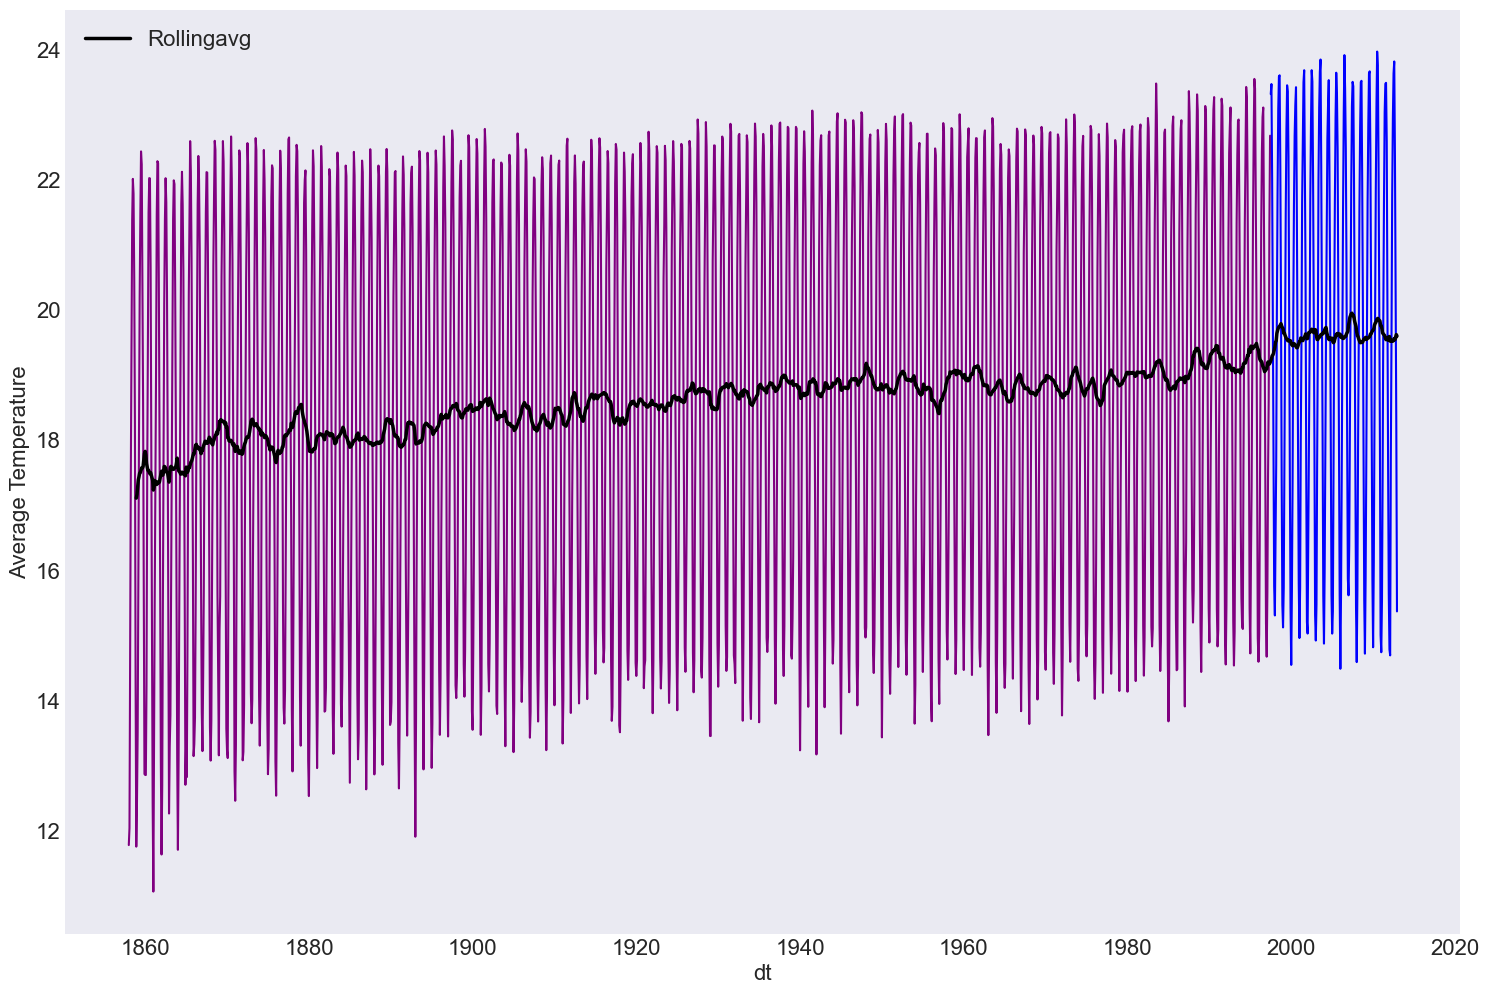

In [66]:
a=df_global_monthly.copy()
a['rolling_avg']=a['AverageTemperature'].rolling( 12).mean()

# Plot train and test data
fig=plt.figure(figsize = (18, 12))
ax=plt.plot(train.AverageTemperature,color='purple')
# ax=plt.plot(val.Target,color='pink')
ax= plt.plot(test.AverageTemperature,color='blue')
plt.ylabel('Average Temperature')
plt.legend(['Train set','validation set', 'Test set'], loc='lower right',fontsize=22)


# plot using rolling average
sns.lineplot( x = a.index,
             y = 'rolling_avg',
             data = a,
             label = 'Rollingavg',
             color='black',
             linewidth=2.5)

print('Dimension of train data: ',train.shape)
# print('Dimension of validation data: ',val.shape)
print('Dimension of test data: ', test.shape)

#Create 'Lagged' Data Frame

In [67]:
# Function that creates the data for training the time series model
def prepare_data(df, num_of_lag_differences): #,seasonal_cycle
    # Get the columns
    column_name = 'AverageTemperature'
    # For the given range, create lagged input feature for the given columns
    for i in range(( num_of_lag_differences ),0, -1):
      name =column_name + '_t-' + str(i)
      df[name] = df[column_name].shift((i)) 
    # Create the target by using next value as the target
    df['Target'] = df['AverageTemperature']
    return df

num_of_lag_differences=12
# Get the training data
train = prepare_data(train, num_of_lag_differences)
train = train.dropna()
train=train.drop(['AverageTemperature'],axis=1)


In [68]:
train


,AverageTemperatureUncertainty,Month,AverageTemperature_t-12,AverageTemperature_t-11,AverageTemperature_t-10,AverageTemperature_t-9,AverageTemperature_t-8,AverageTemperature_t-7,AverageTemperature_t-6,AverageTemperature_t-5,AverageTemperature_t-4,AverageTemperature_t-3,AverageTemperature_t-2,AverageTemperature_t-1,Target
dt,,,,,,,,,,,,,,,
1859-01-01,1.335303,1.0,11.777279,12.040711,14.557608,17.458020,19.502029,21.378656,22.009197,21.780576,20.480167,18.268093,14.271295,11.753100,12.442332
1859-02-01,1.335337,2.0,12.040711,14.557608,17.458020,19.502029,21.378656,22.009197,21.780576,20.480167,18.268093,14.271295,11.753100,12.442332,13.506474
1859-03-01,1.320183,3.0,14.557608,17.458020,19.502029,21.378656,22.009197,21.780576,20.480167,18.268093,14.271295,11.753100,12.442332,13.506474,15.776484
1859-04-01,1.413000,4.0,17.458020,19.502029,21.378656,22.009197,21.780576,20.480167,18.268093,14.271295,11.753100,12.442332,13.506474,15.776484,18.045891
1859-05-01,1.229275,5.0,19.502029,21.378656,22.009197,21.780576,20.480167,18.268093,14.271295,11.753100,12.442332,13.506474,15.776484,18.045891,20.176426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-02-01,0.352350,2.0,15.015779,16.768550,19.019225,21.245225,22.425846,22.959992,23.105517,21.487754,19.690562,17.507958,15.184233,14.670667,15.663213
1997-03-01,0.390462,3.0,16.768550,19.019225,21.245225,22.425846,22.959992,23.105517,21.487754,19.690562,17.507958,15.184233,14.670667,15.663213,17.409150
1997-04-01,0.311921,4.0,19.019225,21.245225,22.425846,22.959992,23.105517,21.487754,19.690562,17.507958,15.184233,14.670667,15.663213,17.409150,18.623750


#Scaling

In [69]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
train_sc  = scaler.fit_transform(train)
# # val_sc  = scaler.transform(val)
# test   = scaler.transform(test)


In [70]:
# # Split the data into input features and targets
# #All features:
# train_x, train_y = train_sc[:,:-1], train_sc[:,-1] #train data is already scaled- this it's Numpy array and not dataFrame
# # val_x, val_y = val_sc[:,:-1], val_sc[:,-1]  # VAL data is already scaled- this it's Numpy array and not dataFrame
# test_x, test_y = test.iloc[:,1:], test.iloc[:,0] # I'm using iloc because the test data is still un-scaled dataFrame. the Y value in this DF is at location 0


Blocking Time Series Split

In [71]:
#Cross validation method in time series- Blocking Time Series Split
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        split_ratio=0.8

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            split = int(split_ratio * (stop - start)) + start
            yield i,indices[start: split], indices[split + margin: stop]
        

In [72]:
def plot_cv_indices(cv, X, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (subset,tr, tt) in enumerate(cv.split(X=X,  groups=None)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
        
    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+2), yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1.2, -.1], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

NameError: name 'y' is not defined

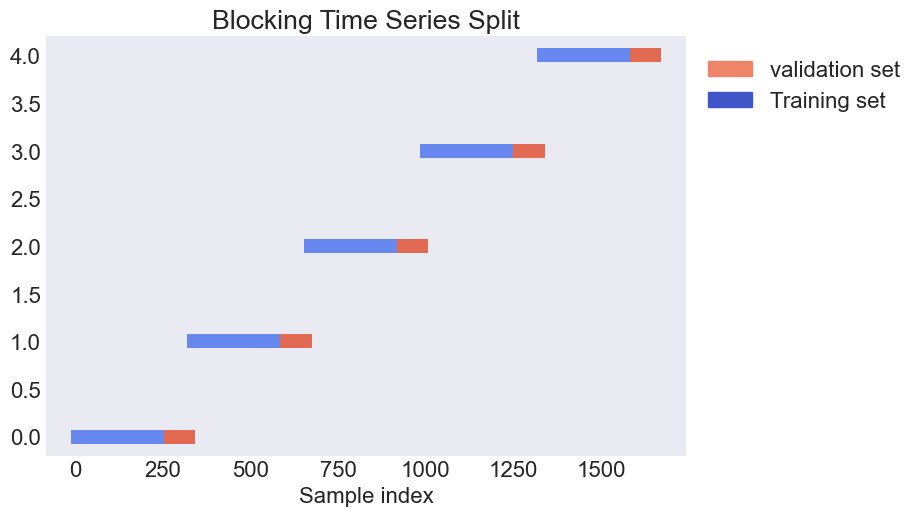

In [74]:
from matplotlib.patches import Patch
cmap_cv = plt.cm.coolwarm
cmap_data=0

n_splits=5
tscv = BlockingTimeSeriesSplit(n_splits=n_splits)
fig, ax = plt.subplots(figsize=(10, 5))  
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
         ['validation set', 'Training set'], loc=(1.02, .8))
plt.tight_layout()
plt.xlabel('Sample index')
plt.title('Blocking Time Series Split')
fig.subplots_adjust(right=.7)    
plot_cv_indices(tscv, train, ax, n_splits) 
plt.show()

# BUILD AND TRAIN RNN AND LSTM MODELS FOR PREDICTING GLOBAL TEMPERATURE TREND

**Reshape to 3D input dataset:**
LSTM, GRU and BiLSTM take a 3D input (num_samples, num_timesteps, num_features). I have create a helper function, 'prepaere data' and another function: "Reshape data set"  to reshape input.
In this project, I define time_steps =12 for the **prepare data'** function. It means that the dataset makes 12 new features of previous 12 months average temperature.

because of this pre-processing stage- i donr need to define to tensor any orhe time-stamp but 1, therefor, in the **"reshape_data_set"** function i will set timestamp to be 1 because in the data set i have prepared i have already representation of the last 12 previous values (as features).

if i had skipped the **prepare data'** function, i didnt have representation of the last 12 months so i have to reshape the data to the tensor to be:
(num of samples/12,12,num of features (1 for univarialte model))



In [75]:
def reshape_data_sets(*args): #must be np.array
  for i in args:
    a=i.reshape((i.shape[0], 1, i.shape[1]))
    return a

In [76]:
def customLoss(y_true, y_pred):
  loss=tf.math.divide_no_nan(tf.abs(y_true-y_pred),y_true)
  return tf.reduce_mean(loss)*100

## Create models, train and fit

### ARIMA

In [77]:
train_arima

,AverageTemperature
dt,
1858-01-01,11.777279
1858-02-01,12.040711
1858-03-01,14.557608
1858-04-01,17.458020
1858-05-01,19.502029
...,...
1997-02-01,15.663213
1997-03-01,17.409150
1997-04-01,18.623750


In [78]:
arima_model = sm.tsa.statespace.SARIMAX(train_arima.asfreq(infered_freq),
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

arima_results = arima_model.fit()

print(arima_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3818      0.021     17.808      0.000       0.340       0.424
ma.L1         -1.0000      0.851     -1.175      0.240      -2.668       0.668
ar.S.L12      -0.5364      0.016    -32.710      0.000      -0.569      -0.504
sigma2         0.1094      0.093      1.174      0.240      -0.073       0.292


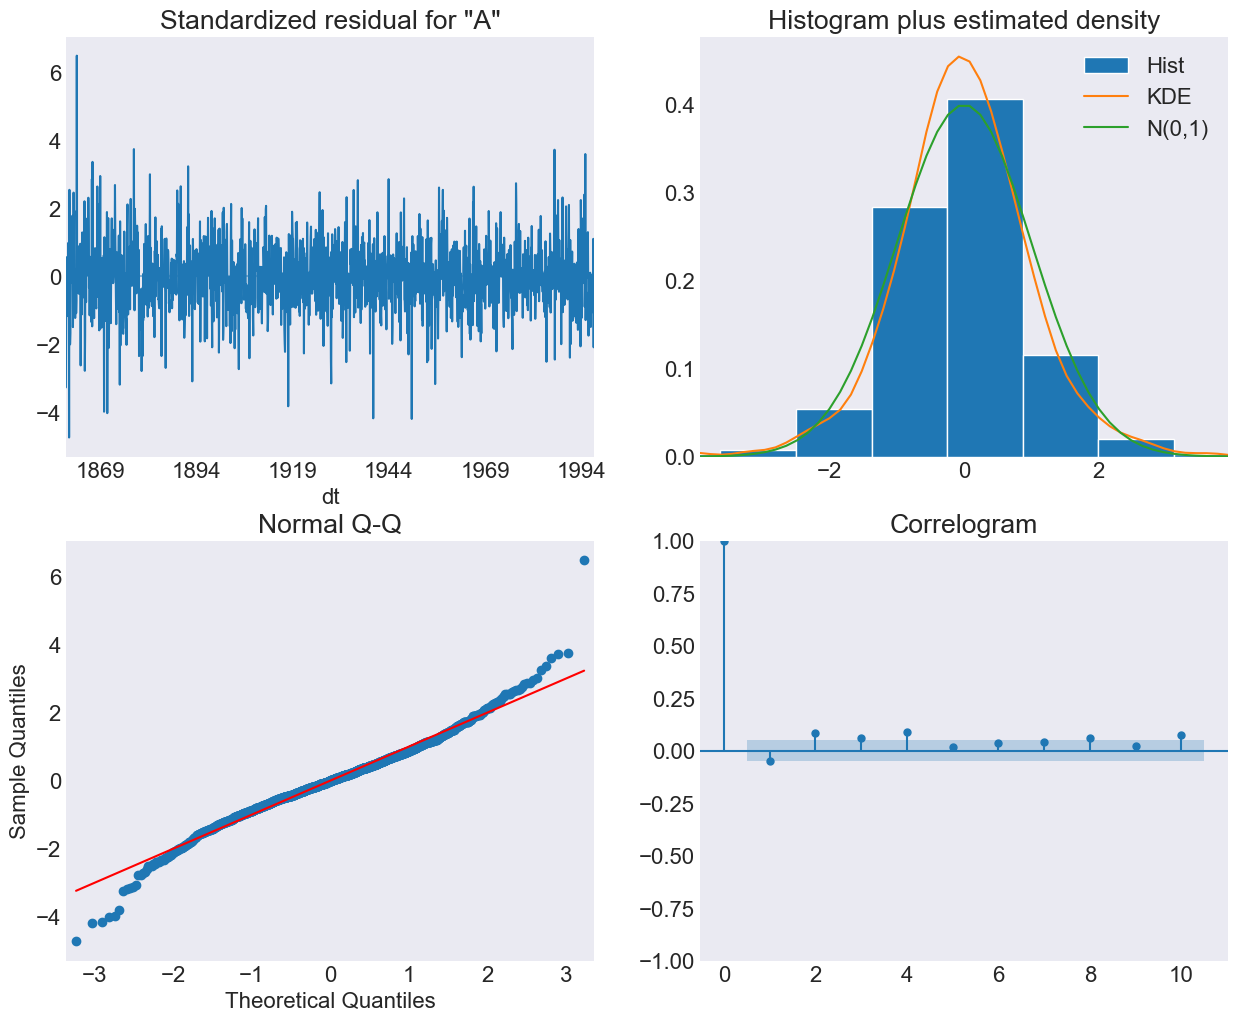

In [79]:
arima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

#interpatations: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [80]:
test_arima

,AverageTemperature
dt,
1997-07-01,23.311613
1997-08-01,23.465817
1997-09-01,22.021842
1997-10-01,19.827313
1997-11-01,17.818846
...,...
2012-08-01,23.812617
2012-09-01,22.374492
2012-10-01,20.281838


In [81]:
start_test_data=test_arima.index[0]
start_test_data

Timestamp('1997-07-01 00:00:00')

In [82]:
pred = arima_results.get_prediction(start=pd.to_datetime(start_test_data), dynamic=False)
pred_ci = pred.conf_int()

In [83]:
df_for_arima_new=df_for_arima.merge(pred_ci,left_index=True, right_index=True)

In [86]:
df_for_arima.index=df_for_arima.index.astype(df_global_monthly.index)

In [87]:
df_for_arima_new=pd.concat([df_for_arima, pred_ci], axis=1)

In [88]:
df_for_arima_new['Average prediction']= df_for_arima_new.iloc[:,1:3].mean(axis=1)
df_for_arima_new['dt']=df_for_arima_new.index
 # Calculate the error 
df_for_arima_new['Error'] = np.abs(df_for_arima_new['AverageTemperature'] - df_for_arima_new['Average prediction'])
df_for_arima_new['APE']=(df_for_arima_new['Error']/df_for_arima_new['AverageTemperature'])*100
df_for_arima_new

MAPE_arima=np.mean(df_for_arima_new['APE'])

  # pred['dt'] = df.index[-test_x.shape[0]:]
  # # Calculate the error 
  # pred['Error'] = np.abs(pred['Original'] - pred['Predicted'])
  # pred['APE']=pred['Error']/pred['Original']*100
        
  # # Create dataframe for visualization
  # df_new=df.copy()
  # df_new['dt']=df_new.index #Bring back the 'dt' to the dataframe
  # df_new = df_new[['dt','Target']][:-test_x.shape[0]]
  # df_new.columns = ['dt','Original']
  # original = df_new.append(pred[['dt','Original']])
  # df_new.columns = ['dt','Predicted']
  # predicted = df_new.append(pred[['dt','Predicted']])
  # original = original.merge(predicted, left_on = 'dt',right_on = 'dt')

  # MAPE=np.mean(pred['APE'])

In [89]:
accuracy_arima=100-MAPE_arima
accuracy_arima

99.93237901967034

In [90]:
df_for_arima_new

,AverageTemperature,lower AverageTemperature,upper AverageTemperature,Average prediction,dt,Error,APE
1858-01-01,11.777279,NaN,NaN,NaN,1858-01-01,NaN,NaN
1858-02-01,12.040711,NaN,NaN,NaN,1858-02-01,NaN,NaN
1858-03-01,14.557608,NaN,NaN,NaN,1858-03-01,NaN,NaN
1858-04-01,17.458020,NaN,NaN,NaN,1858-04-01,NaN,NaN
1858-05-01,19.502029,NaN,NaN,NaN,1858-05-01,NaN,NaN
...,...,...,...,...,...,...,...
2012-08-01,23.812617,NaN,NaN,NaN,2012-08-01,NaN,NaN
2012-09-01,22.374492,NaN,NaN,NaN,2012-09-01,NaN,NaN
2012-10-01,20.281838,NaN,NaN,NaN,2012-10-01,NaN,NaN
2012-11-01,18.225271,NaN,NaN,NaN,2012-11-01,NaN,NaN


### RNN & LSTM

In [91]:
dropout=0.3

In [92]:
def create_shallow_RNN_model(train_x_rs,val_x_rs,hidden_units,optimizer,epochs,batchsize): #dropout,,activation1,activation2
    # Create the model
    inputs = keras.layers.Input(shape = (train_x_rs.shape[1], train_x_rs.shape[2]))
    x = keras.layers.SimpleRNN(hidden_units)(inputs)
    # x = keras.layers.Dropout(0.3)(x)
    # x = keras.layers.SimpleRNN(hidden_units,return_sequences = True)(x)
    # x = keras.layers.Dropout(0.3)(x)
    # x = keras.layers.SimpleRNN(hidden_units)(x)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)

    model_shallow_rnn = keras.Model(inputs = inputs, outputs = outputs)
    model_shallow_rnn.compile(optimizer=optimizer,loss=customLoss,metrics=['mean_absolute_percentage_error'])

    history = model_shallow_rnn.fit(train_x_rs, train_y,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(val_x_rs, val_y),
                    batch_size=batchsize)

    return history,model_shallow_rnn

In [93]:
def create_RNN_model(train_x_rs,val_x_rs,hidden_units,optimizer,epochs,batchsize): #dropout,,activation1,activation2
    # Create the model
    inputs = keras.layers.Input(shape = (train_x_rs.shape[1], train_x_rs.shape[2]))
    x = keras.layers.SimpleRNN(hidden_units,return_sequences =  True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.SimpleRNN(hidden_units,return_sequences = True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.SimpleRNN(hidden_units)(x)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)

    model_rnn = keras.Model(inputs = inputs, outputs = outputs)
    model_rnn.compile(optimizer=optimizer,loss=customLoss,metrics=['mean_absolute_percentage_error'])

    history = model_rnn.fit(train_x_rs, train_y,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(val_x_rs, val_y),
                    batch_size=batchsize)

    return history,model_rnn

In [94]:
def create_LSTM_model(train_x_rs,val_x_rs,hidden_units,optimizer,epochs,batchsize): #dropout,,activation1,activation2
    # Create the model
    inputs = keras.layers.Input(shape = (train_x_rs.shape[1], train_x_rs.shape[2]))
    x = keras.layers.LSTM(hidden_units,return_sequences =  True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(hidden_units, return_sequences = True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(hidden_units)(x)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)

    model_lstm = keras.Model(inputs = inputs, outputs = outputs)
    model_lstm.compile(optimizer=optimizer,loss=customLoss,metrics=['mean_absolute_percentage_error'])

    history = model_lstm.fit(train_x_rs, train_y,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(val_x_rs, val_y),
                    batch_size=batchsize)

    return history,model_lstm

#### Training
choose randomally hyper parameters for RNN and LSTM

In [95]:
hidden_units=5
optimizer='adam'
epochs=100
batchsize=10

tscv = BlockingTimeSeriesSplit(n_splits)
scores_shallow_rnn=[]
scores_rnn = []
scores_lstm = []

#get the block-time-series single fold indices
for sub_set,train_index, val_index in tscv.split(train_sc):
  # print("\n\nsub_set:", sub_set,"\nTRAIN:\n", train_index, "\nval:\n", val_index)

  #subset the scaled train set into rtain and validation according to indeices we got from the prev. step
  train_x = train_sc[train_index,:-1]
  val_x = train_sc[val_index,:-1]
  train_y = train_sc[train_index,-1]
  val_y = train_sc[val_index,-1]
  print (train_x.shape[0],1,train_x.shape[1])
  print (val_x.shape[0],1,val_x.shape[1])

  # #reshape: (sample size,time_stamp (see explanation above), features)
  train_x_rs=train_x.reshape(train_x.shape[0],1,train_x.shape[1])
  val_x_rs=val_x.reshape(val_x.shape[0],1,val_x.shape[1])
  

  #get the block-time-series single fold indices
for sub_set,train_index, val_index in tscv.split(train_sc):
  print ("Fold #",sub_set+1)
 
  #RNN
  history_rnn,model_RNN = create_RNN_model(train_x_rs,val_x_rs,hidden_units=hidden_units,optimizer=optimizer,epochs=epochs,batchsize=batchsize)
  val_rnn_score=100-history_rnn.history['val_loss'][-1]
  # print('MAPE DEEP RNN:  ',history_rnn.history['val_loss'][-1])
  scores_rnn.append(val_rnn_score)

  #LSTM
  history_lstm,model_LSTM = create_LSTM_model(train_x_rs,val_x_rs,hidden_units=hidden_units,optimizer=optimizer,epochs=epochs,batchsize=batchsize)
  # print('MAPE DEEP LSTM:  ',history_lstm.history['val_loss'][-1])
  val_lstm_score=100-history_lstm.history['val_loss'][-1]
  scores_lstm.append(val_lstm_score)

print('Scores from each Iteration- Deep RNN: {}\n Scores from each Iteration- Deep LSTM: {}\n\n'.format(scores_rnn,scores_lstm))
print('Average CV Score- Deep RNN :{}\n Average CV Score- Depp LSTM :{}\n' .format(np.mean(scores_rnn),np.mean(scores_lstm) ))



265 1 14
67 1 14
265 1 14
67 1 14
265 1 14
67 1 14
265 1 14
67 1 14
265 1 14
67 1 14
Fold # 1
Fold # 2
Fold # 3
Fold # 4
Fold # 5
Scores from each Iteration- Deep RNN: [92.207022190094, 92.55462455749512, 93.5291018486023, 94.44940185546875, 93.4044976234436]
 Scores from each Iteration- Deep LSTM: [93.8689775466919, 93.45516633987427, 94.01147842407227, 94.33605098724365, 94.11681938171387]


Average CV Score- Deep RNN :93.22892961502075
 Average CV Score- Depp LSTM :93.95769853591919



#### Visualization

In [96]:
def plot_history(history):
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')  
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)  
    # plt.grid()
    plt.legend(fontsize=20)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Loss')

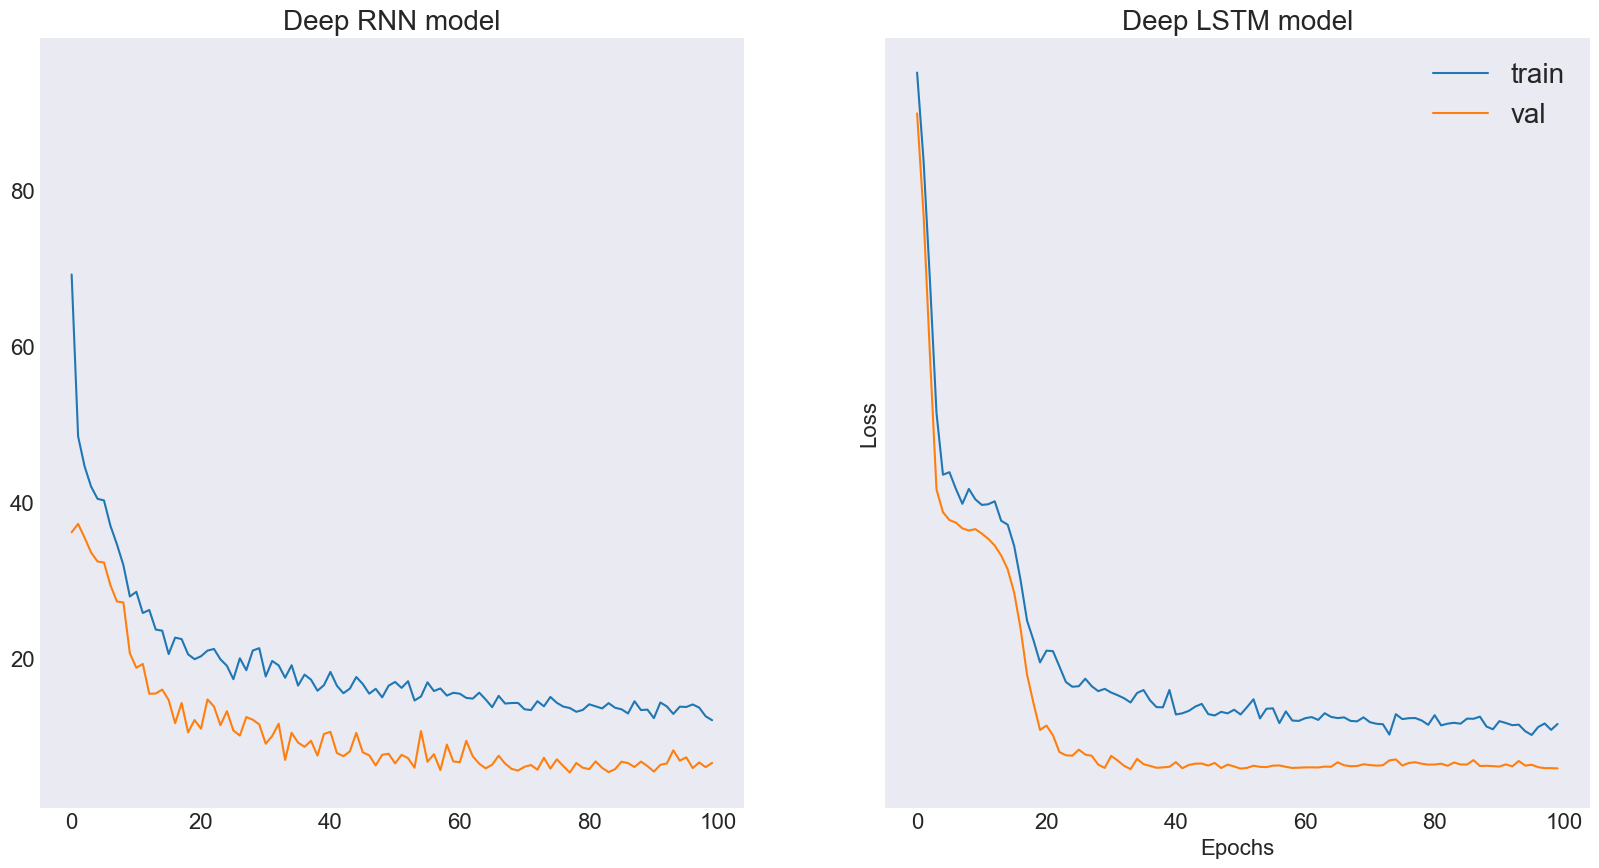

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True,figsize=(20,10))

ax1.set_title("Deep RNN model",fontsize=20)
ax1.plot(history_rnn.history['loss'], label='train')
ax1.plot(history_rnn.history['val_loss'], label='val')
plt.legend(fontsize=20)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)  

ax2.set_title("Deep LSTM model",fontsize=20)
ax2.plot(history_lstm.history['loss'], label='train')
ax2.plot(history_lstm.history['val_loss'], label='val')
plt.legend(fontsize=20)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)  


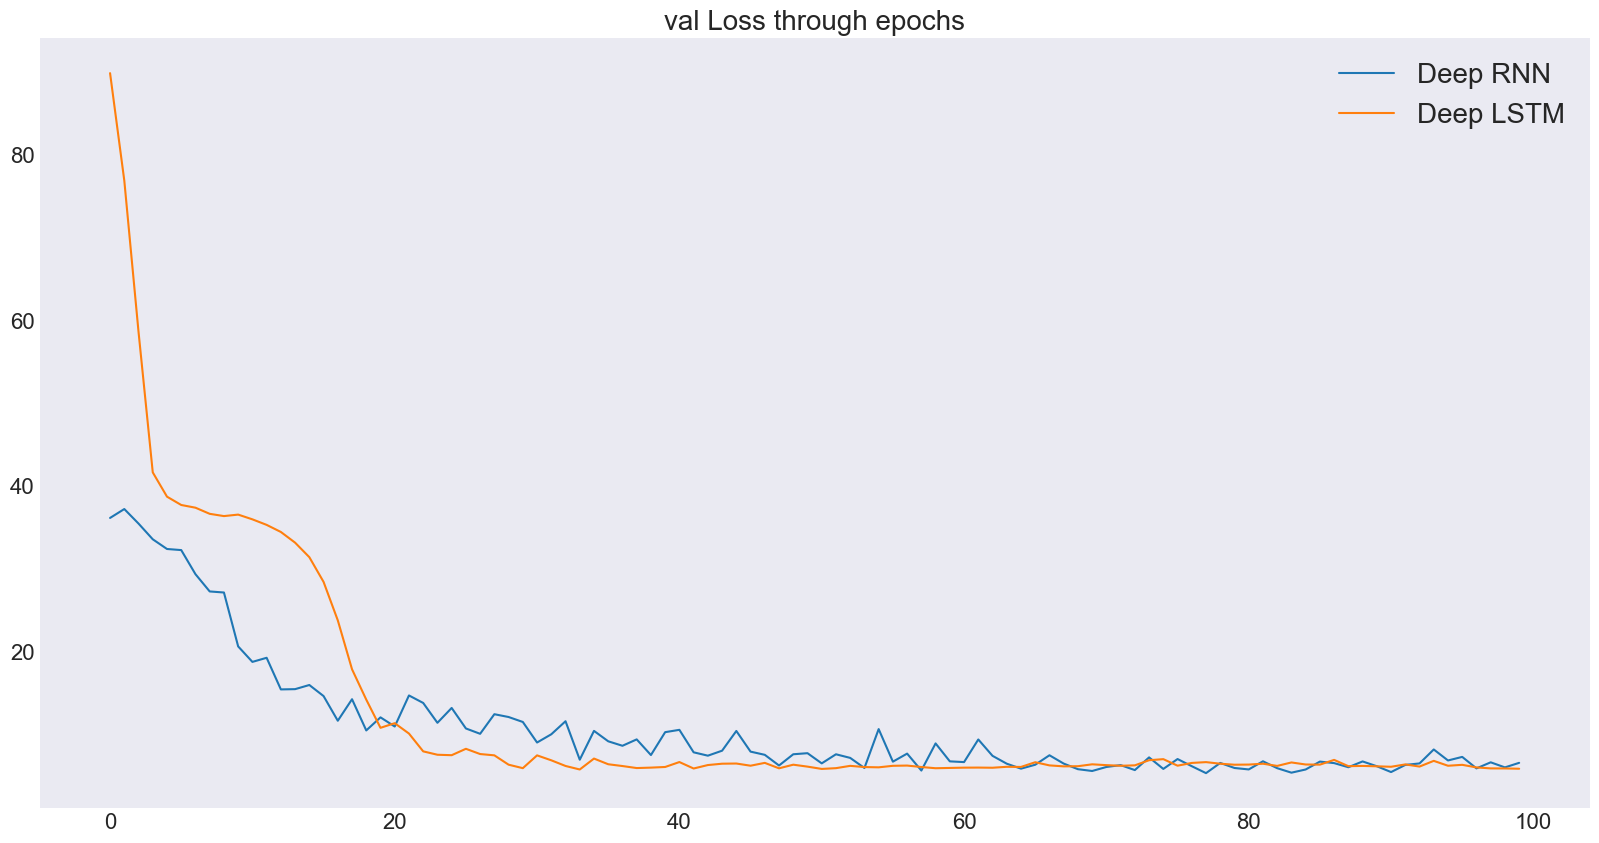

In [98]:
fig = plt.subplots(figsize=(20,10))
# fig.set_title("Loss",fontsize=20)
plt.plot(history_rnn.history['val_loss'], label='Deep RNN')
plt.plot(history_lstm.history['val_loss'], label='Deep LSTM')
plt.title("val Loss through epochs",fontsize=20)
plt.legend(fontsize=20)



In [99]:
def prediction_persistence(test):

  pred=pd.DataFrame(test.iloc[:,0])
  pred['Predicted'] = last_train_value
  pred['dt'] = test.index[-test.shape[0]:]
  # Calculate the error 
  pred['Error'] = np.abs(pred['AverageTemperature'] - pred['Predicted'])
  pred['APE']=pred['Error']/pred['AverageTemperature']*100

  MAPE=np.mean(pred['APE'])
  return pred,MAPE



#### Validation Score:

In [100]:
pred_base_line, MAPE_base_line=prediction_persistence(test)


In [101]:
val_rnn_score=np.mean(scores_rnn)
val_lstm_score=np.mean(scores_lstm)



In [102]:
validation_score=pd.DataFrame()
models=['Deep RNN','Deep LSTM','Naive-Baseline']
validation_score['Models']=['Deep RNN','Deep LSTM','Naive-Baseline']
scores=[val_rnn_score,val_lstm_score,(100-MAPE_base_line)] 
validation_score['validation_score']=[f"{num:.1f}" for num in scores]
validation_score['validation_score']=validation_score['validation_score'].astype(float)

validation_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Models            3 non-null      object 
 1   validation_score  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


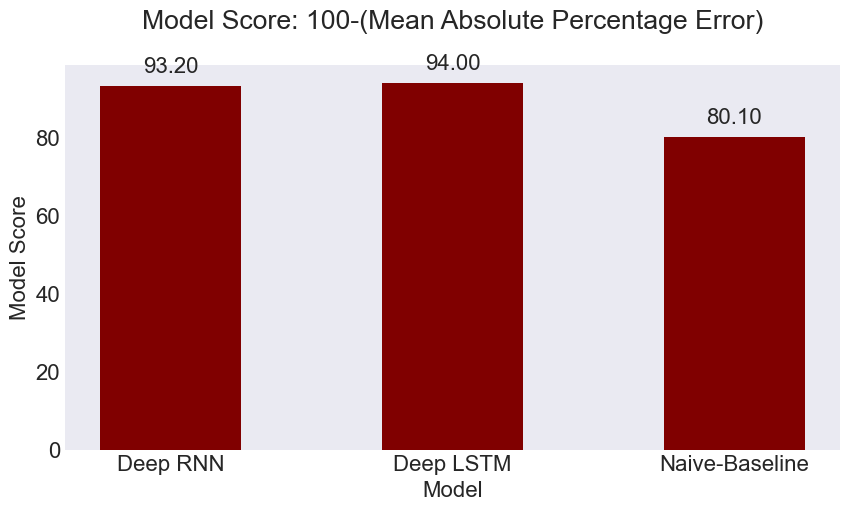

In [103]:

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(validation_score['Models'], validation_score['validation_score'], color ='maroon',
        width = 0.5)
matplotlib.rcParams.update({'font.size': 16})
for x,y in zip(validation_score['Models'], validation_score['validation_score']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel("Model")
plt.ylabel("Model Score")
plt.title("Model Score: 100-(Mean Absolute Percentage Error)\n")
plt.show()

## OPTUNA- Hyper Parameter tuning

In [104]:
def objective(trial):
  hidden_units=trial.suggest_int("hidden_units", 10, 100,step=10, log=False)
  optimizer_name = trial.suggest_categorical("optimizer", ["adam", "SGD", "RMSprop"])
  epochs = trial.suggest_int("epochs", 5, 40,step=5, log=False)
  batchsize = trial.suggest_int("batchsize", 1, 51,step=5, log=False)

  scores_lstm = []
  for sub_set,train_index, val_index in tscv.split(train_sc):
    #LSTM
    history_lstm,model_LSTM = create_LSTM_model(train_x_rs,val_x_rs,hidden_units=hidden_units,optimizer=optimizer,epochs=epochs,batchsize=batchsize)
    val_lstm_per_fold=100-history_lstm.history['val_loss'][-1]
    scores_lstm.append(val_lstm_per_fold)

  val_mape=np.mean(scores_lstm)
  # val_mape = model_LSTM.evaluate(val_x_rs,val_y)[1]
  weights = model_LSTM.get_weights()

  # Handle pruning based on the intermediate value.
  if trial.should_prune():
    raise optuna.exceptions.TrialPruned()

  trial.set_user_attr(key="best_model_weights", value=weights)
  return val_mape

def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_model_weights", 
                            value=trial.user_attrs["best_model_weights"])

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=None, callbacks=[callback])
print(study.best_trial.value)  # Show the best value.


[I 2022-10-27 09:08:35,367] A new study created in memory with name: no-name-a5fb31dd-eeff-426b-a3a4-0690657edd10
[I 2022-10-27 09:09:36,702] Trial 0 finished with value: 94.334183883667 and parameters: {'hidden_units': 40, 'optimizer': 'SGD', 'epochs': 20, 'batchsize': 31}. Best is trial 0 with value: 94.334183883667.
[I 2022-10-27 09:11:29,386] Trial 1 finished with value: 95.49687929153443 and parameters: {'hidden_units': 50, 'optimizer': 'RMSprop', 'epochs': 30, 'batchsize': 11}. Best is trial 1 with value: 95.49687929153443.
[I 2022-10-27 09:12:47,798] Trial 2 finished with value: 95.05643396377563 and parameters: {'hidden_units': 80, 'optimizer': 'adam', 'epochs': 30, 'batchsize': 21}. Best is trial 1 with value: 95.49687929153443.
[I 2022-10-27 09:14:21,251] Trial 3 finished with value: 94.24716110229492 and parameters: {'hidden_units': 10, 'optimizer': 'SGD', 'epochs': 30, 'batchsize': 16}. Best is trial 1 with value: 95.49687929153443.
[I 2022-10-27 09:15:34,560] Trial 4 finis

95.83745594024658


In [114]:
print(study.best_trial.value)
print(study.best_trial.params)


95.83745594024658
{'hidden_units': 40, 'optimizer': 'adam', 'epochs': 35, 'batchsize': 31}


In [107]:
optuna.visualization.plot_optimization_history(study)

Set hyper parameters according to OPTUNA best results

In [115]:
hidden_units=study.best_trial.params['hidden_units']
optimizer=study.best_trial.params['optimizer']
epochs=study.best_trial.params['epochs']
batchsize=study.best_trial.params['batchsize']

Train and fit again with the new hyper parameters

In [116]:
scores_shallow_rnn=[]
scores_rnn = []
scores_lstm = []

#get the block-time-series single fold indices
for sub_set,train_index, val_index in tscv.split(train_sc):
  # print("\n\nsub_set:", sub_set,"\nTRAIN:\n", train_index, "\nval:\n", val_index)

  #subset the scaled train set into rtain and validation according to indeices we got from the prev. step
  train_x = train_sc[train_index,:-1]
  val_x = train_sc[val_index,:-1]
  train_y = train_sc[train_index,-1]
  val_y = train_sc[val_index,-1]
  print (train_x.shape[0],1,train_x.shape[1])
  print (val_x.shape[0],1,val_x.shape[1])

  # #reshape: (sample size,time_stamp (see explanation above), features)
  train_x_rs=train_x.reshape(train_x.shape[0],1,train_x.shape[1])
  val_x_rs=val_x.reshape(val_x.shape[0],1,val_x.shape[1])
  

  #get the block-time-series single fold indices
for sub_set,train_index, val_index in tscv.split(train_sc):
 
  #RNN
  history_rnn,model_RNN = create_RNN_model(train_x_rs,val_x_rs,hidden_units=hidden_units,optimizer=optimizer,epochs=epochs,batchsize=batchsize)
  val_rnn_score=100-history_rnn.history['val_loss'][-1]
  # print('MAPE DEEP RNN:  ',history_rnn.history['val_loss'][-1])
  scores_rnn.append(val_rnn_score)

  #LSTM
  history_lstm,model_LSTM = create_LSTM_model(train_x_rs,val_x_rs,hidden_units=hidden_units,optimizer=optimizer,epochs=epochs,batchsize=batchsize)
  # print('MAPE DEEP LSTM:  ',history_lstm.history['val_loss'][-1])
  val_lstm_score=100-history_lstm.history['val_loss'][-1]
  scores_lstm.append(val_lstm_score)

print('Scores from each Iteration- Deep RNN: {}\n Scores from each Iteration- Deep LSTM: {}\n\n'.format(scores_rnn,scores_lstm))
print('Average CV Score- Deep RNN :{}\n Average CV Score- Depp LSTM :{}\n' .format(np.mean(scores_rnn),np.mean(scores_lstm)))

265 1 14
67 1 14
265 1 14
67 1 14
265 1 14
67 1 14
265 1 14
67 1 14
265 1 14
67 1 14
Scores from each Iteration- Deep RNN: [95.21454572677612, 93.92822599411011, 95.00259160995483, 94.56540298461914, 95.2652759552002]
 Scores from each Iteration- Deep LSTM: [95.68330764770508, 95.92211771011353, 95.10249710083008, 95.48698663711548, 95.79511022567749]


Average CV Score- Deep RNN :94.79520845413208
 Average CV Score- Depp LSTM :95.59800386428833



Validation Score sfter OPTUNA:

In [117]:
val_rnn_score=np.mean(scores_rnn)
val_lstm_score=np.mean(scores_lstm)

validation_score=pd.DataFrame()
models=['Deep RNN','Deep LSTM', 'Naive-Baseline',]
validation_score['Models']=['Deep RNN','Deep LSTM','Naive-Baseline',]
scores=[val_rnn_score,val_lstm_score,(100-MAPE_base_line)] 
validation_score['validation_score']=[f"{num:.1f}" for num in scores]
validation_score['validation_score']=validation_score['validation_score'].astype(float)

validation_score.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Models            3 non-null      object 
 1   validation_score  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


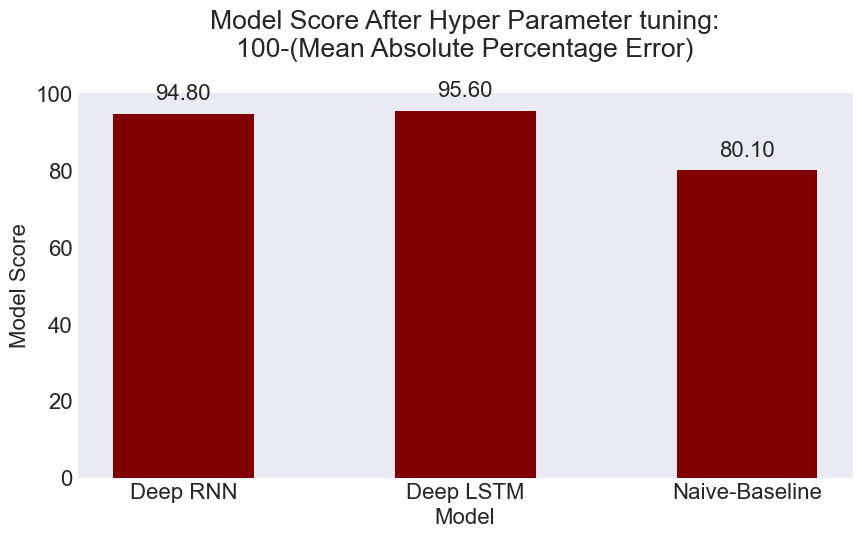

In [118]:
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(validation_score['Models'], validation_score['validation_score'], color ='maroon',
        width = 0.5)
matplotlib.rcParams.update({'font.size': 16})
for x,y in zip(validation_score['Models'], validation_score['validation_score']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel("Model")
plt.ylabel("Model Score")
plt.title("Model Score After Hyper Parameter tuning:\n100-(Mean Absolute Percentage Error)\n")
plt.show()

# Prediction on Test Set

In time series problem the test set obtained from the last X periods of time. In these case- 186 months.

Auto-regressive process to build new ‘Test’ set: The features of the data contain information of the previous 12-time stamps, in the case of the test set we should not have this data available (except for the first sample which contains data from the last 12 real values of the train set) the ‘new’ test set were built in an auto regressive process where the features were generated from latest predictions and not the real test data set. Based on these generated features, the predictions are being made. This method prevents data leaks from training to test set and it provides predictions that are much closer to the results we will get in production when our data will not be seen.


In [119]:
def unified_train_and_val(train,train_x,train_y,val,val_x,val_y):
  train=np.concatenate((train,val),axis=0)
  train_x=np.concatenate((train_x,val_x))
  train_y=np.concatenate((train_y,val_y))
  # train=np.concatenate((train,val),axis=0)
  # train_x=np.concatenate((train_x,val_x),axis=0)
  # train_y=np.concatenate((train_y,val_y),axis=0)


  return train,train_x,train_y



In [120]:
to_initial_test_row=train.iloc[-1] #train_unified[-1]
to_initial_test_row

AverageTemperatureUncertainty     0.327425
Month                             6.000000
AverageTemperature_t-12          22.425846
AverageTemperature_t-11          22.959992
AverageTemperature_t-10          23.105517
AverageTemperature_t-9           21.487754
AverageTemperature_t-8           19.690562
AverageTemperature_t-7           17.507958
AverageTemperature_t-6           15.184233
AverageTemperature_t-5           14.670667
AverageTemperature_t-4           15.663213
AverageTemperature_t-3           17.409150
AverageTemperature_t-2           18.623750
AverageTemperature_t-1           21.269454
Target                           22.672712
Name: 1997-06-01 00:00:00, dtype: float64

In [121]:
#Create frame to test data:
test = prepare_data(test, num_of_lag_differences)
test=test.drop(['AverageTemperature'],axis=1)

In [122]:
def Auto_regressive_prediction(model,test):
  test_y=test.iloc[:,-1]
  test_x_ff=test.iloc[0,]

  columns=[test_x_ff.index]
  index=2

  #create prediction data set. i will fill this set sample after sample while i'll base my prediction calculaion on prev. predicted temperature


  '''                                          FIRST TEST RECORD
                                            -----------------------'''
  #fill first row based on known train data
  for i in range(2,len(test_x_ff)-1):
    test_x_ff[i]=to_initial_test_row[index+1]
    index=index+1
  print("new test_x:",test_x_ff)
  sample= test_x_ff.to_numpy().reshape(1,-1)
  sample=scaler.transform(sample)
  x=sample[:,:-1]
  sample_rss=x.reshape(1,1,14) #reshape to fit RNN prediction

  #predict of the 1st sample:
  perdict_first=model.predict(sample_rss)
  print(perdict_first)
  print(perdict_first.shape)

  # Reshape sample for inverse transform and visualization
  sample = sample_rss.copy().reshape((sample_rss.shape[0], sample_rss.shape[2]))
  test_new=np.append(sample,perdict_first, axis=1) ##add the prediction before inverse transform
  test_new= scaler.inverse_transform(test_new)
  test_new=pd.DataFrame(test_new,columns=columns)
  test_new=test_new.rename(columns={'Target': 'Prediction'})
  columns=[test_new.columns.get_level_values(0)] #need to flat the columns because for some reason it appeared to be MultiIndex which cause a problem to append later with new samples


  '''                                           ALL OTHER RECORDS
                                            -----------------------'''
  remain_test=test.iloc[1:,:]
  for i in range(len(remain_test)):
    sample=remain_test.iloc[i,:]
    for column in range (2,len(sample)-1):
      sample[column]=test_new.iloc[-1,column+1]
    sample= sample.to_numpy().reshape(1,-1)
    sample=scaler.transform(sample)
    x=sample[:,:-1]
    sample_rss=x.reshape(1,1,14) #reshape to fit RNN prediction
    perdict=model.predict(sample_rss)

    # Reshape sample for inverse transform and visualization
    sample = sample_rss.copy().reshape((sample_rss.shape[0], sample_rss.shape[2]))
    new=np.append(sample,perdict, axis=1) ##add the prediction before inverse transform
    new= scaler.inverse_transform(new)

    df1 = pd.DataFrame(new,columns=columns,index=[i+1])
    test_new=pd.concat([test_new, df1])

  pred = pd.DataFrame()
  pred['Original'] = test_y.values
  pred['Predicted'] = test_new.iloc[:,-1]
  pred['dt'] = test.index[-test.shape[0]:]
  # Calculate the error 
  pred['Error'] = np.abs(pred['Original'] - pred['Predicted'])
  pred['APE']=(pred['Error']/pred['Original'])*100

  MAPE=np.mean(pred['APE'])
  return pred,MAPE




In [123]:
pred_rnn, MAPE_rnn = Auto_regressive_prediction(model_RNN,test)
pred_lstm, MAPE_lstm = Auto_regressive_prediction(model_LSTM,test)



new test_x: AverageTemperatureUncertainty     0.358067
Month                             7.000000
AverageTemperature_t-12          22.959992
AverageTemperature_t-11          23.105517
AverageTemperature_t-10          21.487754
AverageTemperature_t-9           19.690562
AverageTemperature_t-8           17.507958
AverageTemperature_t-7           15.184233
AverageTemperature_t-6           14.670667
AverageTemperature_t-5           15.663213
AverageTemperature_t-4           17.409150
AverageTemperature_t-3           18.623750
AverageTemperature_t-2           21.269454
AverageTemperature_t-1           22.672712
Target                           23.311613
Name: 1997-07-01 00:00:00, dtype: float64
1/1 [==============================] - 0s 434ms/step
[[0.94235826]]
(1, 1)
1/1 [==============================] - 0s 26ms/step
new test_x: AverageTemperatureUncertainty     0.358067
Month                             7.000000
AverageTemperature_t-12          22.959992
AverageTemperature_t-11          

In [124]:
def plot_prediction(df1,title1,df2,title2,df3,title3,x_axes='Date'):#,df4,title4
  from plotly.subplots import make_subplots
  fig = make_subplots(rows=1, cols=2,subplot_titles=('Prediction vs. Actual: ','Mean Absolute Precentage Error: '))

  if 'dt' in df1.columns:
    x = df1['dt']
  else:
    x = df1.index
  fig.add_scatter(x = x, y = df1['Original'], name = 'Original', row=1, col=1,mode='lines+markers', line=dict(color="black"),legendgroup = '1')
  fig.add_scatter(x = x, y = df1['Predicted'], name = 'Predicted: '+title1, row=1, col=1,opacity = 0.5,mode='lines+markers', line=dict(color='purple'),legendgroup = '1')
  fig.add_scatter(x = x, y = df2['Predicted'], name = 'Predicted: '+title2, row=1, col=1,mode='lines+markers', line=dict(color='blue'),legendgroup = '1')
  fig.add_scatter(x = x, y = df3['Predicted'], name = 'Predicted: '+title3, row=1, col=1,opacity = 0.5,mode='lines+markers', line=dict(color="orange"),legendgroup = '1')
  # fig.add_scatter(x = x, y = df4['Predicted'], name = 'Predicted: '+title4, row=1, col=1,opacity = 0.5,mode='lines+markers', line=dict(color="pink"),legendgroup = '1')


  fig.add_scatter(x = x, y = df1['APE'], name = 'MAPE-'+title1, opacity = 0.5,row=1, col=2,mode='lines+markers', line=dict(color='purple'),legendgroup = '2')
  fig.add_scatter(x = x, y = df2['APE'], name = 'MAPE-'+title2, row=1, col=2,mode='lines+markers', line=dict(color='blue'),legendgroup = '2')
  fig.add_scatter(x = x, y = df3['APE'], name = 'MAPE-'+title3, opacity = 0.5,row=1, col=2,mode='lines+markers', line=dict(color="orange"),legendgroup = '2')
  # fig.add_scatter(x = x, y = df4['APE'], name = 'MAPE-'+title4, opacity = 0.5,row=1, col=2,mode='lines+markers', line=dict(color="pink"),legendgroup = '2')


  fig.update_xaxes(title_text=x_axes)
  fig.update_layout(height=500,legend_tracegroupgap = 180)
  fig.show()

# ASSESS MODEL PERFORMANCE (GLOBAL DATA)

In [125]:
test_score=pd.DataFrame()
models=['Deep RNN','Deep LSTM','Naive-Baseline']
test_score['Models']=['Deep RNN','Deep LSTM','Naive-Baseline']
scores=[(100-MAPE_rnn),(100-MAPE_lstm),(100-MAPE_base_line)]
test_score['test_score']=[f"{num:.1f}" for num in scores]
test_score['test_score']=test_score['test_score'].astype(float)
test_score

,Models,test_score
0,Deep RNN,95.7
1,Deep LSTM,95.7
2,Naive-Baseline,80.1


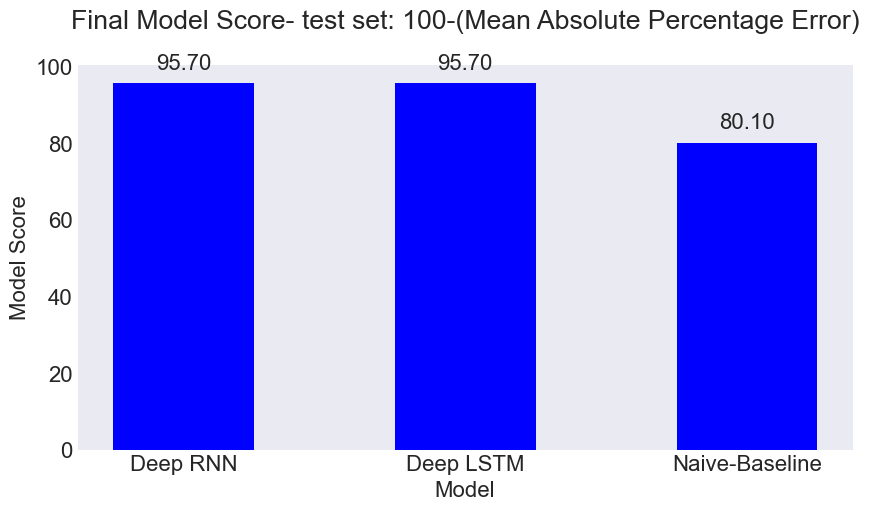

In [126]:
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(test_score['Models'], test_score['test_score'], color ='blue',
        width = 0.5)
matplotlib.rcParams.update({'font.size': 16})

for x,y in zip(test_score['Models'], test_score['test_score']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel("Model")
plt.ylabel("Model Score")
plt.title("Final Model Score- test set: 100-(Mean Absolute Percentage Error)\n")
plt.show()

In [127]:
print('MAPE DEEP RNN:',MAPE_rnn)
print('MAPE DEEP LSTM:',MAPE_lstm)
print('MAPE base_line:',MAPE_base_line)
# print('MAPE Random Forest:',MAPE_rf)
print('\n\nAccuracy RNN:',100-MAPE_rnn)
print('Accuracy LSTM:',100-MAPE_lstm)
print('Accuracy base_line:',100-MAPE_base_line)
# print('Accuracy Random Forest:',100-MAPE_rf)

MAPE DEEP RNN: 4.278347730076347
MAPE DEEP LSTM: 4.279490560485398
MAPE base_line: 19.881669759507073


Accuracy RNN: 95.72165226992365
Accuracy LSTM: 95.7205094395146
Accuracy base_line: 80.11833024049292


In [134]:
def PredictionGrouedby_MonthYear(df):
  #year:
  df['Year']=df['dt'].apply(lambda x: x.split('-')[0])
  df['Year']=df['Year'].astype(int)

  #month:
  df['Month']=df['dt'].apply(lambda x: x.split('-')[1])
  df['Month']=df['Month'].astype(int)

  prediction_per_year=df.groupby(['Year']).mean()
  prediction_per_year=prediction_per_year.drop(['Month'],axis=1)


  prediction_per_month=df.groupby(['Month']).mean()
  prediction_per_month=prediction_per_month.drop(['Year'],axis=1)
  print(prediction_per_month)

  return prediction_per_year,prediction_per_month



In [140]:
pred_rnn['dt'].apply(lambda x: x.year)


0      1997
1      1997
2      1997
3      1997
4      1997
       ... 
181    2012
182    2012
183    2012
184    2012
185    2012
Name: dt, Length: 186, dtype: int64

In [141]:
def PredictionGrouedby_MonthYear(df):
  #year:
  df['Year']=df['dt'].apply(lambda x: x.year)
  df['Year']=df['Year'].astype(int)

  #month:
  df['Month']=df['dt'].apply(lambda x: x.month)
  df['Month']=df['Month'].astype(int)

  prediction_per_year=df.groupby(['Year']).mean()
  prediction_per_year=prediction_per_year.drop(['Month'],axis=1)


  prediction_per_month=df.groupby(['Month']).mean()
  prediction_per_month=prediction_per_month.drop(['Year'],axis=1)
  print(prediction_per_month)

  return prediction_per_year,prediction_per_month


In [142]:
pred_rnn_by_year,pred_rnn_by_month=PredictionGrouedby_MonthYear(pred_rnn)
pred_lstm_by_year,pred_lstm_by_month=PredictionGrouedby_MonthYear(pred_lstm)
pred_base_line_by_year,pred_base_line_by_month=PredictionGrouedby_MonthYear(pred_base_line)


        Original  Predicted     Error       APE
Month                                          
1      14.900446  15.758937  0.906579  6.131761
2      15.809133  16.642136  0.998324  6.402679
3      17.730232  18.295447  0.647674  3.671385
4      19.712714  20.122160  0.492402  2.502023
5      21.657039  21.486518  0.220091  1.014496
6      22.901946  22.179239  0.722707  3.148463
7      23.543247  22.395857  1.147390  4.862053
8      23.548812  22.018327  1.530485  6.492501
9      22.215859  20.952968  1.262891  5.669640
10     20.120952  19.213876  0.907076  4.491007
11     17.789246  17.358637  0.436306  2.432071
12     15.531676  16.196778  0.671298  4.347140
        Original  Predicted     Error       APE
Month                                          
1      14.900446  14.686743  0.389207  2.585150
2      15.809133  15.980907  0.637776  4.074729
3      17.730232  18.082539  0.616023  3.483544
4      19.712714  20.337147  0.762807  3.869351
5      21.657039  22.093931  0.486456  2

In [144]:
print('MAPE-RNN model: ',MAPE_rnn,'\nMAPE-LSTM model: ',MAPE_lstm,'\nMAPE-Base-Line- Persistence model ',MAPE_base_line)
plot_prediction(pred_rnn_by_year,"RNN model",pred_lstm_by_year,"LSTM model",pred_base_line_by_year,"Base-Line- Persistence model",x_axes='Year') #,pred_rf_by_year,"RF model"
plot_prediction(pred_rnn_by_month,"RNN model",pred_lstm_by_month,"LSTM model",pred_base_line_by_month,"Base-Line- Persistence model:",x_axes='Month') #,pred_rf_by_month,"RF model"


MAPE-RNN model:  4.278347730076347 
MAPE-LSTM model:  4.279490560485398 
MAPE-Base-Line- Persistence model  19.881669759507073


In [145]:
fig = make_subplots(rows=1, cols=1,subplot_titles=('Mean Absolute Precentage Error: '))
if 'dt' in pred_rnn.columns:
  x = pred_rnn['dt']
else:
  x = pred_rnn.index
# fig.add_scatter(x = x, y = pred_rnn['Original'], name = 'Original', row=1, col=2,mode='lines+markers', line=dict(color="black"),legendgroup = '1')
# fig.add_scatter(x = x, y = pred_rnn['Predicted'], name = 'Predicted- RNN: ', row=1, col=2,opacity = 0.5,mode='lines+markers', line=dict(color='purple'),legendgroup = '1')
# fig.add_scatter(x = x, y = pred_lstm['Predicted'], name = 'Predicted-LSTM ', row=1, col=2,mode='lines+markers', line=dict(color='blue'),legendgroup = '1')
# fig.add_scatter(x = x, y = pred_base_line['Predicted'], name = 'Predicted-Base-Line- Persistence model ', row=1, col=2,opacity = 0.5,mode='lines+markers', line=dict(color="orange"),legendgroup = '1')
# fig.add_scatter(x = x, y = pred_rf['Predicted'], name = 'Predicted-Base-Line- Persistence model ', row=1, col=2,opacity = 0.5,mode='lines+markers', line=dict(color="pink"),legendgroup = '1')

fig.add_scatter(x = x, y = pred_base_line['APE'], name = 'MAPE-Base-Line- Persistence model', opacity = 0.5,row=1, col=1,mode='lines+markers', line=dict(color="orange"),legendgroup = '2')
# fig.add_scatter(x = x, y = pred_rf['APE'], name = 'MAPE-Base-Line- RF',row=1, col=1,mode='lines+markers', line=dict(color="red"),legendgroup = '2')
fig.add_scatter(x = x, y = pred_rnn['APE'], name = 'MAPE-RNN', row=1, col=1,mode='lines+markers', line=dict(color='purple'),legendgroup = '2')
fig.add_scatter(x = x, y = pred_lstm['APE'], name = 'MAPE- LSTM', row=1, col=1,mode='lines+markers', line=dict(color='blue'),legendgroup = '2')




fig.update_layout(height=700,legend_tracegroupgap = 180)
fig.show()

